<a href="https://colab.research.google.com/github/koheikobayashi/machine-learning/blob/main/LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gini impurity

Gini impurity（ジニ不純度）は、決定木アルゴリズムでノードの純度を測定するために広く使われる指標です。この指標を使用することで、どの特徴がデータセットをよりよく分割するかを判断することができます。Gini impurityは数式で表されます。

$$
G(i) = 1 - \sum_{k=1}^m (p_{i,k})^2
$$

ここで、
- \( G(i) \): ノード \( i \) におけるGini impurity
- \( m \): クラスの数
- \( p_{i,k} \): ノード \( i \) におけるクラス \( k \) の割合

Gini impurityは1に近いほど不純度が高く、0に近いほど不純度が低いことを意味します。LightGBMなどの機械学習アルゴリズムでの使用用途は主に決定木ベースのモデルにおける分割の最適化です。多くのデータセットやタスクで効果的な分割を行うことができるため、モデルの性能を向上させます。

In [1]:
# Gini impurity を計算するためのPythonコード

def gini_impurity(class_counts):
    # クラスの割合を計算
    total_samples = sum(class_counts)
    print("Total samples:", total_samples)
    probabilities = [count / total_samples for count in class_counts]
    print("Probabilities:", probabilities)
    # Gini impurity の計算
    gini = 1 - sum([p ** 2 for p in probabilities])
    print("Gini Impurity:", gini)
    return gini

# クラス 0, 1, 2 のサンプル数がそれぞれ 10, 20, 30 の場合の例
class_counts = [10, 20, 30]
gini = gini_impurity(class_counts)


Total samples: 60
Probabilities: [0.16666666666666666, 0.3333333333333333, 0.5]
Gini Impurity: 0.6111111111111112


# エントロピー

エントロピーは情報理論において、情報の不確実性やランダム性を定量化するための尺度です。エントロピーが高いほど、データのばらつきが大きいことを示しています。エントロピーは確率分布 \( p(x) \) に関して次の数式で表されます。

$$
H(X) = -\sum_{i} p(x_i) \log p(x_i)
$$

この数式で使われている記号の意味を解説します。
- \( H(X) \): ランダム変数 \( X \) のエントロピー。
- \( p(x_i) \): 各事象 \( x_i \) の確率。
- \( \sum \): 確率分布の全ての事象に対する総和。
- \( \log \): 対数関数で、通常2を底とした対数（情報量をビット単位で表現するため）が用いられる。

エントロピーはLightGBMなどの木ベースのアルゴリズムでも使用されており、情報ゲインの計算に役立ちます。情報ゲインによって分割の良さを評価することができ、結果として最適な決定木の構造が導出されます。

In [2]:
# Pythonでエントロピーを計算する例
import numpy as np

# サンプルデータの確率分布
probabilities = np.array([0.1, 0.2, 0.7])

# エントロピーの計算
entropies = -probabilities * np.log2(probabilities)

# 各事象のエントロピーを表示
print("Individual entropies:", entropies)

# 全体のエントロピー（情報量の総和）を計算
entropy = np.sum(entropies)

# エントロピーの結果を表示
print("Total entropy:", entropy)

# コードの解説
# - import numpy as np: NumPyライブラリを読み込み、名前をnpとして参照します。
# - probabilitiesにサンプルデータの確率分布（0.1, 0.2, 0.7の事象の確率）を設定します。
# - エントロピーを計算するために、各確率に対して-log2(確率)を掛けてエントロピーを各事象に対し求めます。
# - 各事象のエントロピーを表示します。計算結果は、情報量をビット単位で各事象について出力します。
# - np.sumを用いて、確率分布における全体のエントロピーを計算します。
# - 計算した全体のエントロピーを出力します。

Individual entropies: [0.33219281 0.46438562 0.36020122]
Total entropy: 1.1567796494470395


# MSE

MSE（Mean Squared Error：平均二乗誤差）は、予測値と実際の値の差の二乗の平均を求める指標で、以下の数式で表されます。

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

ここで、
- \( n \) はデータの総サンプル数を示します。
- \( y_i \) は実際の値（ターゲット変数）を示します。
- \( \hat{y}_i \) は予測値を示します。

MSEは、モデルの予測が実際のデータにどれだけ近いかを測る指標として使用され、値が小さいほど良い予測性能を示します。LightGBMをはじめとするグラデーションブースティングモデルでは、誤差を最小化するための損失関数として使われることが一般的です。

次に、Pythonを用いてこのMSEの計算を実装します。このコードを通して、MSEの計算プロセスを理解してください。

In [3]:
# 実際の値
y_true = [3, -0.5, 2, 7]

# 予測値
y_pred = [2.5, 0.0, 2, 8]

# 予測誤差（residuals）の計算
errors = [(yt - yp)**2 for yt, yp in zip(y_true, y_pred)]  # 各予測値と実際の値の差を二乗してリストに格納する
print('Errors:', errors)  # 各サンプルの二乗誤差を表示する

# 平均二乗誤差の計算
mse = sum(errors) / len(y_true)  # 二乗誤差の合計をサンプル数で割ることでMSEを求める
print('MSE:', mse)  # 計算されたMSEの値を表示する

Errors: [0.25, 0.25, 0, 1]
MSE: 0.375


# 情報利得 (Information Gain)

### 情報利得 (Information Gain)の解説

情報利得は、決定木やブースティングアルゴリズム（例えば、LightGBM）などで重要な概念です。情報利得は、あるノードの不純度が分割によってどれだけ減少したかを定量化するための指標です。これによって、データ分割において、どの特徴を選ぶべきかを判断します。

情報利得は以下の数式で表現されます：

$$ IG(T, X) = H(T) - \sum_{v \in Values(X)} \frac{|T_v|}{|T|}H(T_v) $$

- \( IG(T, X) \): 特徴Xを使ったノードの情報利得
- \( H(T) \): ノードTのエントロピー
- \( Values(X) \): 特徴Xがとる可能性のある値の集合
- \( T_v \): 特徴Xが値vをとる場合のデータのサブセット
- \( |T| \): ノードTの全データ数
- \( |T_v| \): 特徴Xが値vをとる場合のデータ数

### LightGBMとの関係性

LightGBMは、Gradient Boosting Decision Tree (GBDT) をベースにした機械学習ライブラリで、情報利得を使って最適な分割を決定し、木構造を育てます。これにより、特に大規模なデータセットに対して効率的かつ精度の高いモデリングを可能にします。

情報利得を考慮することで、LightGBMは各ステップで最も情報価値の高い特徴を選び、モデルの精度を向上させます。

### 使用用途

情報利得は、どの特徴を選んで決定木を分割するかを評価するために使われます。高い情報利得を与える特徴は、対象変数に対してより関連性の高い情報を提供するため、モデルにとって有用です。

In [4]:
# 必要なライブラリをインポート
import numpy as np
import pandas as pd

# エントロピーを計算する関数の定義
def entropy(y):
    # クラスラベルのユニークな値とその出現頻度を取得
    class_counts = np.bincount(y)
    # 出現確率を計算
    probabilities = class_counts / len(y)
    # エントロピー計算：クラスラベルの情報の不純度を示す指標
    entropy_value = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    print('Entropy:', entropy_value)
    return entropy_value

# 情報利得を計算する関数の定義
def information_gain(y, y_left, y_right):
    # 算出元ノードのエントロピー
    parent_entropy = entropy(y)
    # 各サブノードのエントロピー
    n = len(y)
    n_left, n_right = len(y_left), len(y_right)
    # 分割後の情報利得の計算：もとのエントロピーから分割後の平均的なエントロピーを引く
    weighted_avg_entropy = ((n_left / n) * entropy(y_left)) + ((n_right / n) * entropy(y_right))
    print('Weighted average entropy:', weighted_avg_entropy)
    info_gain = parent_entropy - weighted_avg_entropy
    print('Information Gain:', info_gain)
    return info_gain

# ダミーデータを準備
y = np.array([0, 0, 1, 1, 1])  # 親ノードのラベル
y_left = np.array([0, 0])      # 左サブノードのラベル
y_right = np.array([1, 1, 1])  # 右サブノードのラベル

# 情報利得を計算して出力
information_gain(y, y_left, y_right)


Entropy: 0.9709505944546686
Entropy: -0.0
Entropy: -0.0
Weighted average entropy: -0.0
Information Gain: 0.9709505944546686


0.9709505944546686

# 勾配 (Gradient)

勾配 (Gradient)は多変数関数の出力の変化の割合を計算するためのベクトルです。関数における方向微分を計算するために使われ、最急降下法などの最適化手法に利用されます。勾配は次のように数学的に表現できます：$$\nabla f(x) = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right]$$\nこの数式の意味は次のとおりです:\n- \(\nabla f(x)\)は、関数\(f\)の勾配ベクトルを示します。\n- \(\frac{\partial f}{\partial x_i}\)は、関数\(f\)に対する変数\(x_i\)の偏導関数を示しています。\n\nLightGBMを含む多くの機械学習アルゴリズムでは、損失関数を最小化するために勾配を使用します。特にLightGBMは勾配ブースティングを使用し、各ステップで勾配を計算して木を構築します。この面で、勾配が重要な役割を果たします。

In [5]:
# 勾配を計算するためのPythonの例
import numpy as np

def f(x):
    # 二次関数を例として使います。
    return x[0]**2 + x[1]**2

# 求める点x (例として[1, 2])
x = np.array([1.0, 2.0])

# 小さい値を定義して数値微分を近似
h = 1e-5

grad = np.zeros_like(x)  # 勾配を保存するための変数

# 各変数について偏微分を計算
for i in range(len(x)):
    # xのコピーを作成してx_iをhだけ増加
    x_i_h = x.copy()
    x_i_h[i] += h

    # 数値微分の公式に基づいて勾配を計算
    grad[i] = (f(x_i_h) - f(x)) / h

# 勾配を出力
print("勾配:", grad)



勾配: [2.00001 4.00001]


# ヘッシアン (Hessian)

### ヘッシアン (Hessian)の理論と数式

ヘッシアン行列は、多変数関数の2次微分を用いた微分行列です。これは、関数の曲率を示すもので、関数の最小または最大を見つけるために使用されます。特に、機械学習アルゴリズムであるLightGBM（Light Gradient Boosted Machine）では重要な役割を果たします。

ヘッシアン行列は、2階微分で構成されます。関数 \( f(x_1, x_2, ..., x_n) \) のヘッシアン行列 \( H \) は以下のように表現されます：

$$
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$

- \( \frac{\partial^2 f}{\partial x_i \partial x_j} \) は \( f \) の \( x_i \) に対する1階微分を取り、その結果を \( x_j \) に対してもう一度微分したもので、2階混合偏微分と言います。

LightGBMでは、各データポイントの目的関数に対する勾配やヘッシアンを計算します。特に、勾配ブースティングアルゴリズムでは、目的関数のヘッシアンを使って学習過程でのステップを調整します。

### 使用用途
- **最適化問題**: ニュートン法を用いて最適化を行うとき、ヘッシアンを使用し曲面の形状を分析する。
- **機械学習**: LightGBMのような勾配ブースティングで、モデルを更新するための勾配計算に利用される。

### ヘッシアンの数値計算 - Python例
以下のPythonコードは、2次関数のヘッシアン行列を計算する例です。

In [6]:
import numpy as np
from sympy import symbols, hessian, Function

# 変数を設定
x, y = symbols('x y')

# 関数を定義
f = Function('f')(x, y)
f = x**2 + x*y + y**2

# ヘッシアン行列を計算
hess_matrix = hessian(f, (x, y))

# ヘッシアン行列の結果を表示
print('ヘッシアン行列:', hess_matrix)

# 行列の数値計算
x_val = 1
y_val = 1
hess_numeric = np.array(hess_matrix.subs({x: x_val, y: y_val})).astype(np.float64)
print('数値計算したヘッシアン:', hess_numeric)

# コードの解説
# 1. 必要なライブラリをインポートします。
# 2. sympyを用いてシンボリック変数x, yを定義します。
# 3. 多変数関数fをxとyの関数として定義します。
# 4. sympyのhessianメソッドにより、関数fのヘッシアン行列を計算します。
# 5. 結果として得られるシンボリックなヘッシアン行列を出力します。
# 6. 実際の数値を代入して、ヘッシアン行列を数値計算します。
# 7. 特定のx, yの値に対する数値ヘッシアンを出力します。

ヘッシアン行列: Matrix([[2, 1], [1, 2]])
数値計算したヘッシアン: [[2. 1.]
 [1. 2.]]


# Leaf-wise Growth

Leaf-wise Growth（リーフ・ワイズ・グロース）は、決定木の生成方法の1つで、一般的にLightGBM（Light Gradient Boosting Machine）で使用されます。LightGBMは、Microsoft社が開発した勾配ブースティング決定木（GBDT）の実装の一種で、高速で高精度なモデルを構築することができます。

Leaf-wise Growthの特徴として、分岐すべき葉ノード（リーフノード）を選ぶ際に、現在のすべての葉を対象に最も損失が減少する葉を最初に分割するというアプローチがあります。この方法は、通常、深い木を構築するため、より少ないメモリでより良い精度が得られる一方で、過学習のリスクを伴う可能性もあります。

Leaf-wise Growthは以下の数式で表現できます：

$$
L(y, F(x)) = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(F(x_i)) + (1 - y_i) \log(1 - F(x_i))] + \Omega(F)
$$

- $L(y, F(x))$は損失関数で、モデルの予測と実際の目標値の違いを測定します。
- $F(x)$はモデルの予測結果です。
- $y_i$は実際の目標値です。
- $x_i$は入力データの特徴ベクトルです。
- $N$はデータセットのサンプル数です。
- $\Omega(F)$はペナルティ項で、モデルの複雑さに関連しています。

この数式の簡易版を用いてLeaf-wiseの成長をPythonで実装してみます。

In [ ]:
# 必要なライブラリをインストール
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# データセットの読み込み
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# データセットの状態を確認
print('Training feature shape:', X_train.shape)
print('Testing feature shape:', X_test.shape)

# LightGBM用のデータに変換
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# パラメータの設定
params = {
    'objective': 'multiclass',  # 目標
    'num_class': 3,             # クラス数
    'metric': 'multi_logloss',  # 損失関数
    'boosting': 'gbdt',         # ブースティング手法
    'num_leaves': 31,           # 葉の数
    'learning_rate': 0.05,      # 学習率
    'feature_fraction': 0.8     # 特徴の選択率
}

# モデルのトレーニング
model = lgb.train(params, train_data, valid_sets=[test_data], early_stopping_rounds=10)

# 予測
preds = model.predict(X_test)

# 予測結果の状態を確認
print('Predictions:', preds)

# 予測の結果を簡単に評価
from sklearn.metrics import accuracy_score
pred_labels = [list(p).index(max(p)) for p in preds]
accuracy = accuracy_score(y_test, pred_labels)
print('Accuracy:', accuracy)

# コードの解説
# 1. 必要なライブラリをインポートします。
# 2. アイリスデータセットをロードし、トレーニングとテストに分割します。分割されたデータの形状を確認します。
# 3. データをLightGBM用のDataset型に変換します。
# 4. モデルのパラメータを設定し、目的、クラス数、評価基準などを指定します。
# 5. 訓練データを使ってLightGBMのモデルをトレーニングします。
# 6. テストデータで予測を行い、結果を出力します。
# 7. 予測値を正しいクラスに変換し、精度評価を行います。

# Histogram-based Splitting

Histogram-based Splitting（ヒストグラムベースの分割）は、主に勾配ブースティング決定木（GBDT）の分岐処理を効率化するために利用されています。LightGBMは、この技術を採用することで、高速で省メモリな学習を実現しています。

この手法では、特徴量を事前にいくつかのビン（ヒストグラムのバケット）に離散化し、これらのビンに基づいて分割点を決定します。これにより、連続的な値を扱うよりも計算コストが抑えられ、効率的な処理が可能となります。

Histogram-based Splittingの主な数式は以下です。特徴量の値をビンに分割し、各ビンに対して情報ゲイン（またはジニ不純度）を計算します。

$$
\text{Gain}(b) =
\frac{(\sum_{i \in left(b)} g_i)^2}{\sum_{i \in left(b)} h_i + \lambda} +
\frac{(\sum_{i \in right(b)} g_i)^2}{\sum_{i \in right(b)} h_i + \lambda} -
\frac{(\sum_{i = 1}^{n} g_i)^2}{n + \lambda}
$$

ここで、
- \( g_i \) はサンプル \( i \) の勾配。
- \( h_i \) はサンプル \( i \) のヘッセ行列の対角成分。
- \( \lambda \) は正則化定数。
- \( left(b) \) と \( right(b) \) はビン \( b \) の左右に分割されたサンプル群です。

この数式を使って、各ビンでの情報ゲインを計算し、最大の情報ゲインが得られるビンの位置を分割のポイントとして選択します。

この手法をPythonで表現すると、以下のようになります。

In [8]:
# サンプルデータとして勾配(g)とヘッセ行列(h)のリストを用意
import numpy as np

g = np.array([0.1, 0.2, -0.1, 0.05, -0.05])
h = np.array([0.01, 0.01, 0.01, 0.01, 0.01])

# 正則化定数を定義
lambda_reg = 0.1

# ビンの分割を行うための境界を設定
bins = np.array([-0.1, 0.0, 0.1])

# 各ビンに対して情報ゲインを計算する
best_gain = -np.inf
best_bin = None

for b in range(len(bins)-1):
    left_indices = np.where((g >= bins[b]) & (g < bins[b+1]))[0]
    right_indices = np.where((g < bins[b]) | (g >= bins[b+1]))[0]

    gain = (
        (np.sum(g[left_indices]) ** 2) / (np.sum(h[left_indices]) + lambda_reg) +
        (np.sum(g[right_indices]) ** 2) / (np.sum(h[right_indices]) + lambda_reg) -
        (np.sum(g) ** 2) / (len(g) + lambda_reg)
    )

    print(f"Bin range {bins[b]} to {bins[b+1]}: Gain = {gain}")

    if gain > best_gain:
        best_gain = gain
        best_bin = b

print(f"Best bin for split is between {bins[best_bin]} and {bins[best_bin+1]} with gain {best_gain}")

# 各行の解説
# 1. 必要なライブラリをインポート
# 2. gとhはサンプルの勾配とヘッセ行列の対角成分として、サンプルデータを設定
# 3. 正則化定数(lambda_reg)を0.1に設定
# 4. ビンの境界を設定するためのリストを用意
# 5. 初期化として、最良のゲイン(best_gain)を無限小に設定し、最良のビンインデックス(best_bin)をNoneに
# 6. 各ビンの範囲についてループ処理を開始
# 7. 現在のビンbの範囲にあるインデックスを取得（left_indices）
# 8. 現在のビンb以外の範囲にあるインデックスを取得（right_indices）
# 9. 各ビンについて情報ゲインを計算
# 10. 計算されたゲインを出力
# 11. 計算されたゲインがこれまでで最大であれば、それを最良のゲインとする
# 12. 最良のビンの位置を出力



Bin range -0.1 to 0.0: Gain = 1.1219645550527906
Bin range 0.0 to 0.1: Gain = 0.17559842118665653
Best bin for split is between -0.1 and 0.0 with gain 1.1219645550527906


# GOSS (Gradient-based One-Side Sampling)

GOSS (Gradient-based One-Side Sampling)はLightGBMのブースティングフレームワークで用いられるデータサンプリングのテクニックです。大量のデータセットに対して非常に効果的で、特に勾配ブースティング決定木（GBDT）での学習プロセスを加速させるために利用されます。GOSSの主なアイデアは、データインスタンスを勾配の絶対値に基づいてサンプリングすることです。

GOSSは、以下のような数式で表現されます。

$$G_{i} = \frac{-\partial L(y_{i}, f_{i})}{\partial f_{i}}$$

- $G_{i}$: インスタンスiの勾配
- $L$: 損失関数
- $y_{i}$: インスタンスiのラベル
- $f_{i}$: インスタンスiの予測

GOSSを実装する手順は以下の通りです：
1. 勾配の絶対値が大きいサンプルを全て選びます。
2. 残りのサンプルから勾配の絶対値に基づいてランダムにサンプリングします。

これにより、重要なサンプルを維持しつつ、データサイズを削減します。その結果、LightGBMの学習プロセスが軽量化され、高速になります。

In [9]:
# GOSSのPythonによる簡単な実装例
import numpy as np

# ダミーデータの準備
data_size = 1000  # データサイズを定義
y_true = np.random.rand(data_size)  # ラベル、乱数を使って生成
y_pred = np.random.rand(data_size)  # モデルの予測値、乱数を使って生成

# 損失関数としてのMSEの勾配の計算
gradients = -2 * (y_true - y_pred)  # 勾配の定義
print('Gradients:', gradients)  # 勾配を出力

# GOSSのサンプリングプロセス
retain_top_ratio = 0.2  # 勾配の絶対値が大きいデータの割合を指定
random_sample_ratio = 0.1  # その他からランダムにサンプリングする割合を指定

# 勾配の絶対値が大きいサンプルを全て選び出す
abs_gradients = np.abs(gradients)
sorted_indices = np.argsort(abs_gradients)[::-1]
retain_indices = sorted_indices[:int(data_size * retain_top_ratio)]
print('Retain Indices:', retain_indices)  # 保持するインデックスを出力

# 残りのサンプルからランダムにサンプリング
remaining_indices = sorted_indices[int(data_size * retain_top_ratio):]
random_sample_size = int(data_size * random_sample_ratio)
random_sample_indices = np.random.choice(remaining_indices, random_sample_size, replace=False)
print('Random Sample Indices:', random_sample_indices)  # ランダムにサンプリングしたインデックスを出力

# 選ばれたインデックスを結合
selected_indices = np.concatenate((retain_indices, random_sample_indices))
print('Selected Indices:', selected_indices)  # 最終的にサンプリングされたインデックスを出力

# サンプリングされたデータセットを取得
sampled_y_true = y_true[selected_indices]
sampled_y_pred = y_pred[selected_indices]
print('Sampled y_true:', sampled_y_true)  # サンプリングされたラベルを出力
print('Sampled y_pred:', sampled_y_pred)  # サンプリングされた予測を出力


Gradients: [-4.48700425e-01 -9.40715998e-01  4.01213477e-01  1.17042896e+00
 -1.67899400e-01 -1.83347642e-01  7.11036867e-01 -1.47664103e-01
 -1.12760364e+00  9.73739001e-01 -6.91675490e-01  6.94903401e-01
  8.42240653e-01  1.12873271e+00  1.25699506e+00 -8.14734685e-01
 -9.70502633e-01  6.58935446e-01  1.34737099e+00  6.30205993e-01
 -1.14951236e-01  4.85034279e-01 -1.57585400e+00  9.43404150e-02
  9.53127053e-01  3.99417316e-02  5.30570905e-02  3.51314802e-02
  1.24408764e-01 -1.38523369e+00  4.32240143e-01  1.47628945e+00
  1.08999186e+00 -1.86365315e-01 -3.74729229e-01  5.62223518e-03
 -2.88640773e-01 -7.25002848e-01 -2.58935216e-01 -2.55693533e-01
  1.10441286e+00 -7.56876594e-01  4.25771419e-01 -4.04750501e-01
  1.34643718e+00 -1.56856874e+00  6.75719871e-01 -5.13948282e-01
  8.88532291e-01 -4.28614909e-01  6.25650233e-01  6.07596256e-01
  1.10297310e-01 -1.61914081e+00 -5.25235854e-01 -4.37781511e-01
 -2.36235029e-01  3.58687681e-01 -4.74882772e-01 -6.52974763e-01
  1.56707228e-

# Exclusive Feature Bundling (EFB)

Exclusive Feature Bundling (EFB) は、互いに排他的な特徴をバンドルすることによって特徴量を効率的に扱う手法です。EFBはLightGBMにおいて高次元データでも効率的に学習を行うために使用されます。

数式で具体的に表現すると、EFBはあるデータ行列 \( X \) の列をバンドルする操作であり、以下のように表現されます。

$$
\text{If } X[:, i] \neq 0 \text{ for any row, then } X[:, j] = 0, \text{ then features } i \text{ and } j \text{ can be bundled together.}
$$

### 記号の説明
- \(X[:, i]\): 行列 \(X\) の \(i\) 番目の列。
- \(\neq 0\): 非ゼロ要素。

この数式は、異なる特徴列が同じ行において非ゼロでない場合、それらの特徴はバンドル可能であることを示しています。即ち、互いに排他的な特徴を同じ特徴に結合することで高次元のデータを縮約する方法です。

EFBを使用することによって、モデルはメモリ消費量を減らし、より大きなデータセットで効率的に動作します。例えば、カテゴリ変数をワンホットエンコードした場合に、ある行において一つの変数が一度しか現れないとき、EFBはこれらを一つの特徴にまとめることが出来ます。

In [10]:
# EFBのPythonのサンプル実装
import numpy as np

# 排他的な特徴の例
X = np.array([
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 3],
    [4, 0, 0]
])

# バンドルされた特徴を格納するリスト
bundled_features = []

# 行列内の排他的特徴をバンドルする処理
for i in range(X.shape[1]):
    # 現在の特徴が他の特徴と排他的か確認
    is_exclusive = True
    for j in range(X.shape[1]):
        if i != j and np.any(X[:, i] & X[:, j]):
            # 排他的ではない特徴があればフラグを下ろす
            is_exclusive = False
            break
    if is_exclusive:
        # 排他的な特徴であればバンドルリストに追加
        bundled_features.append(i)

# バンドルされた特徴の結果を表示
print("Bundled Features:", bundled_features)

# 詳細解説:
# 1. np.array で排他的特徴を模した行列 X を定義。
# 2. bundled_features リストを準備し、ここにバンドル可能な特徴インデックスを格納。
# 3. ループを使って各特徴列を確認走査。
# 4. 各特徴が他特徴列と排他的かをチェック。排他的でない場合、フラグを下げてスキップ。
# 5. 排他的と確認された特徴のインデックスを bundled_features に追加し、最終的なバンドル結果を表示。


Bundled Features: [0, 1, 2]


# Early Stopping

Early Stopping（アーリーストッピング）は、機械学習のトレーニングプロセスにおいて、過学習を防ぐためのテクニックです。過学習は、モデルが訓練データに過度に適合してしまい、テストデータや未知のデータに対しての予測精度が低下する現象です。Early Stoppingは主に検証データセットを用いて、訓練が過度に進む手前でストップします。

数式で表現する場合、基本的なアイデアは以下のようになります：

$$\text{EarlyStop\_point} = \min\{ t \mid \forall s > t, \text{loss}_s > \text{min\_loss}_{1:t} + \epsilon \}$$

- $t$: トレーニングのステップ（またはエポック）
- $	ext{loss}_s$: ステップ $s$ における損失（error）
- $	ext{min\_loss}_{1:t}$: ステップ 1 から $t$ までの最小損失
- $\epsilon$: 許容される範囲

LightGBMでは、一般的に検証データを用いてモニタリングする損失がエラー率や精度であることが多く、ユーザーが指定した何エポック以上に渡って改善が見られない場合にトレーニングをストップします。

## Early Stoppingの使用用途
Early Stoppingは主に以下のような状況で使用されます：

1. **過学習の防止**: 訓練データに対してモデルが過度に適合し、汎化性能が低下するのを防ぎます。
2. **計算資源の節約**: トレーニングの計算コストが高い場合に、不要なエポックのトレーニングを省きます。
3. **ベストモデルの保存**: モデルが最も良いパフォーマンスを示したポイントの重みを保存します。

In [ ]:
# Early Stoppingを使ったモデル学習の例
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# 擬似データの生成
X = np.random.rand(1000, 10)  # 1000個のサンプル、10個の特徴量
Y = np.random.rand(1000)       # 目標変数

# データの訓練セットと検証セットへの分割
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# LightGBMデータセットの作成
d_train = lgb.Dataset(X_train, label=Y_train)
d_val = lgb.Dataset(X_val, label=Y_val, reference=d_train)

# モデルの訓練
early_stopping_rounds = 10
params = {
    'objective': 'regression',
    'metric': 'l2',  # 二乗誤差の最小化を目的とする
}

# 学習プロセスを実行、早期終了を設定
model = lgb.train(
    params,
    d_train,
    valid_sets=[d_train, d_val],
    valid_names=['train', 'valid'],
    early_stopping_rounds=early_stopping_rounds
)

# モデルの最良エポック数の確認
print(f'Best iteration: {model.best_iteration}')

# 検証セットでの予測結果の取得
y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

# 検証セットでのRMSEの計算
rmse = np.sqrt(mean_squared_error(Y_val, y_pred_val))
print(f'Validation RMSE: {rmse}')

# trainデータでの予測結果の取得
y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)

# モデルの予測チェック
print(f'y_pred_val: {y_pred_val[:5]}')  # 最初の5つを表示
print(f'y_pred_train: {y_pred_train[:5]}')

# Learning Rate Decay

### Learning Rate Decayの解説

Learning Rate Decay（学習率減少）は、機械学習においてモデルの学習率を徐々に減少させる手法のことを指します。これは、モデルのトレーニングが進むにつれて学習率を小さくすることで、モデルが最終的な最適値に収束しやすくするために用いられます。一般的に、トレーニングの初期段階では大きな学習率を使い、大きなステップで学習を進め、徐々に学習率を減少させて微調整を行います。

#### 数式

学習率減少は以下のような指数関数的な数式で表されます：

$$
\eta_t = \eta_0 \times \text{decay}^{t/T}
$$

ここで、
- $\eta_t$ は時刻 $t$ における学習率
- $\eta_0$ は初期学習率
- $\text{decay}$ は減衰率（一般的に 0 < decay < 1）
- $T$ は総ステップ数

#### LightGBMとの関係性

LightGBMは勾配ブースティングフレームワークの一つで、学習率を調整する機能を備えています。学習率減少を使うことで、モデルをより適切に最適化し、過学習を防ぐことができます。

#### 使用用途

- 学習率減少はモデルが早期に最適化されすぎて、最小値を見逃すことを防ぎます。
- 微調整が重要なコンペティションや多くの反復が要求される場面で有効です。

In [12]:
# Learning Rate Decayを実装するPythonコード

import numpy as np

# 初期学習率
initial_learning_rate = 0.1
print('初期学習率:', initial_learning_rate)

# 減衰率
decay_rate = 0.9
print('減衰率:', decay_rate)

# 総ステップ数
total_steps = 100
print('総ステップ数:', total_steps)

# 学習率を計算する関数

def learning_rate_decay(initial_lr, decay, step, total_steps):
    # 学習率を計算
    lr = initial_lr * (decay ** (step / total_steps))
    return lr

# 各ステップでの学習率を保存するリスト
learning_rates = []

# ステップごとに学習率を計算し、リストに追加
for step in range(total_steps):
    lr = learning_rate_decay(initial_learning_rate, decay_rate, step, total_steps)
    learning_rates.append(lr)
    print(f"ステップ {step} の学習率: {lr}")

# 計算結果を確認
print('計算された学習率の一覧:', learning_rates)

初期学習率: 0.1
減衰率: 0.9
総ステップ数: 100
ステップ 0 の学習率: 0.1
ステップ 1 の学習率: 0.09989469496904545
ステップ 2 の学習率: 0.09978950082958632
ステップ 3 の学習率: 0.09968441746484832
ステップ 4 の学習率: 0.09957944475818009
ステップ 5 の学習率: 0.09947458259305311
ステップ 6 の学習率: 0.09936983085306157
ステップ 7 の学習率: 0.09926518942192226
ステップ 8 の学習率: 0.0991606581834744
ステップ 9 の学習率: 0.09905623702167954
ステップ 10 の学習率: 0.09895192582062146
ステップ 11 の学習率: 0.0988477244645059
ステップ 12 の学習率: 0.09874363283766067
ステップ 13 の学習率: 0.09863965082453532
ステップ 14 の学習率: 0.09853577830970106
ステップ 15 の学習率: 0.09843201517785072
ステップ 16 の学習率: 0.09832836131379849
ステップ 17 の学習率: 0.09822481660247988
ステップ 18 の学習率: 0.09812138092895158
ステップ 19 の学習率: 0.0980180541783913
ステップ 20 の学習率: 0.09791483623609769
ステップ 21 の学習率: 0.09781172698749015
ステップ 22 の学習率: 0.09770872631810879
ステップ 23 の学習率: 0.09760583411361419
ステップ 24 の学習率: 0.0975030502597874
ステップ 25 の学習率: 0.09740037464252968
ステップ 26 の学習率: 0.09729780714786251
ステップ 27 の学習率: 0.09719534766192733
ステップ 28 の学習率: 0.09709299607098555
ステップ 29 の学習率

# L1/L2 正則化

### L1/L2正則化の理論と数式

L1およびL2正則化は、機械学習モデルの過学習を防ぐためのテクニックです。過学習とは、モデルが訓練データに対しては非常に高い性能を示すが、新しいデータに対しては性能が著しく低下する現象です。これを防ぐために、モデルの複雑さを制御し、汎化性能を向上させる目的で正則化が用いられます。

#### L1正則化（Lasso正則化）
L1正則化は、モデルの重みの絶対値の和をペナルティとして追加する手法です。

数式：
$$
L(w) = L_0(w) + \lambda \sum_{i=1}^{n} |w_i|
$$

- $L(w)$: 正則化項を加えた最小化したい目的関数（例えば損失関数）
- $L_0(w)$: 正則化なしの元の目的関数
- $\lambda$: 正則化の強さを調整するハイパーパラメータ
- $w_i$: モデルの各パラメータや重み

L1正則化はスパース性（多くの重みがゼロになるようにすること）を生みやすく、特徴選択によく使われます。

#### L2正則化（Ridge正則化）
L2正則化は、モデルの重みの二乗の和をペナルティとして追加する手法です。

数式：
$$
L(w) = L_0(w) + \lambda \sum_{i=1}^{n} w_i^2
$$

- $L(w)$, $L_0(w)$, $\lambda$, $w_i$: 上記のL1正則化と同様です。

L2正則化では、重みがゼロに正確に近づくことは少ないですが、全体的に小さな値になり、滑らかなモデルが作られます。

LightGBMは、ブースティングツリーアルゴリズムであり、木の成長過程において過学習を防ぐためにこれらの正則化を用います。

### 使用用途
- L1正則化: 特徴選択が重要な問題に利用します。多くの特徴があるデータセットにおいて、重要な特徴を選び出すのに役立ちます。
- L2正則化: 過学習を抑え、スムーズな予測を行いたい場合や、多くの特徴が少しずつ予測に寄与するようなデータセットに用います。

In [13]:
# L1正則化をPythonで実装する例
import numpy as np

# モデルの重み（例えば線形回帰の係数）
weights = np.array([1.5, -0.3, 0.7])
# 正則化項の強さ
lambda_param = 0.1  # λ

# L1 正則化項の計算
l1_regularization = lambda_param * np.sum(np.abs(weights))

# 結果の表示
print('L1 Regularization Term:', l1_regularization)

# ---

# L2正則化をPythonで実装する例

# L2 正則化項の計算
l2_regularization = lambda_param * np.sum(weights**2)

# 結果の表示
print('L2 Regularization Term:', l2_regularization)

# コードの解説：
# 1. NumPyライブラリをインポートします。NumPyは数値計算を効率的に行うためのライブラリです。
# 2. モデルの重みをweightsとして定義します。この例では、3つの異なる重みがあり、それぞれの値を設定しています。
# 3. 正則化の強さを示すlambda_paramを設定します。これは正則化項の影響を調整します。
# 4. L1正則化項は、全ての重みの絶対値の和に正則化パラメータを掛け合わせて計算します。
# 5. 計算したL1正則化項を出力します。
# 6. L2正則化項は、全ての重みの二乗の和に正則化パラメータを掛け合わせて計算します。
# 7. 計算したL2正則化項を出力します。

L1 Regularization Term: 0.25
L2 Regularization Term: 0.283


# SHAP値 (SHapley Additive exPlanations)

### SHAP値 (SHapley Additive exPlanations)の理論と数式

SHAP値は、ゲーム理論におけるShapley値を基盤として設計されたもので、各特徴量の重要度を解釈可能にするための手法です。モデルの予測を各特徴量の寄与に分解し、説明する際に利用されます。

数式的には、SHAP値 \( \phi_i \) は以下のように表されます。

$$
\phi_i(f) = \sum_{S \subseteq \{x_1, x_2, \dots, x_N\} \setminus \{x_i\}} \frac{|S|!(N-|S|-1)!}{N!} [f(S \cup \{x_i\}) - f(S)]
$$

ここで、
- \( \phi_i(f) \) は特徴量 \(i\) の SHAP値です。
- \(S\) は特徴量の部分集合です。
- \(N\) は全特徴量数です。
- \(f(S)\) は部分集合 \(S\) による予測です。

この数式は、全ての特徴量組み合わせについての寄与度の期待値を計算し、その寄与度を合算することで求められます。

### LightGBMにおけるSHAP値の利用

LightGBMは、勾配ブースティングフレームワークであり、高速で精度の高い予測が可能です。SHAP値は、このLightGBMの各特徴量の重要性を解釈するために利用され、多数の特徴量からなるモデルの説明性を高めます。

### 使用用途

- **特徴量の重要性の説明**: モデルの予測が各特徴にどのように依存しているかを可視化。
- **モデルの解釈性向上**: モデルが具体的にどの特徴量に基づいて予測しているのかを解析。
- **異常検知**: どの特徴が異常を引き起こしているかを特定。



In [ ]:
# SHAP値の簡単な計算例とその解説

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from shap import TreeExplainer, summary_plot, initjs
from sklearn.datasets import load_boston

# Bostonデータセットの読み込み（特徴量とターゲット）
boston = load_boston()
X, y = boston.data, boston.target

# RandomForest回帰モデルの訓練
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

# TreeExplainerを使ってSHAP値を計算
explainer = TreeExplainer(model)
shap_values = explainer.shap_values(X)

# SHAP値を出力（各サンプルの各特徴に対するSHAP値）
print(shap_values)

# SHAP値の要約プロットを表示
# 各特徴の影響を視覚化します
initjs()
summary_plot(shap_values, X, feature_names=boston.feature_names)

# コードの詳細な解説
# 1. 必要なライブラリをインポートします。
# 2. sklearnのデータセットをロードします。ここではボストン住宅価格データセットを使用します。
# 3. RandomForest回帰モデルをインスタンス化し、学習させます。
# 4. SHAPのTreeExplainerを使用して、訓練したモデルに基づくSHAP値を計算します。
# 5. 各データポイントに対するSHAP値を出力し、各特徴に対してどのように予測に寄与しているかを確認します。
# 6. SHAP値の要約プロットは、各特徴がモデルの予測にどのように影響しているのかを視覚化します。重要かつ影響の大きな特徴を簡単に特定することができます。


# Permutation Importance

### Permutation Importanceの理論

Permutation Importanceは、モデルの予測性能において、各特性（特徴量）がどの程度重要かを評価する方法です。この手法は、特徴量の重要度を測定するために特徴量の値をシャッフルし、それがモデルの予測性能に与える影響を評価します。

Permutation Importanceは以下の数式で表現できます：

$$ PI(f_i) = \frac{1}{N} \sum_{j=1}^N (L(f, X, y) - L(f, X^{\pi(i)}, y)) $$

この数式の記号の意味を解説します：
- \( PI(f_i) \)：特徴量\( f_i \)のPermutation Importance。
- \( N \)：データの総数。
- \( L(f, X, y) \)：モデル\( f \)を用いたデータ\( X \)とラベル\( y \)での損失関数の値。
- \( X^{\pi(i)} \)：特徴量\( f_i \)のみをシャッフルしたデータセット。
- \( L(f, X^{\pi(i)}, y) \)：特徴量\( f_i \)をシャッフルしたデータでのモデルの損失関数。

LightGBMとの関係で言うと、LightGBMは決定木をベースにした学習アルゴリズムで高い予測性能を持つ一方、各特徴量の重要度を計算する方法が組み込まれています。Permutation Importanceを利用すると、LightGBMの予測結果に対して、各特徴量がどの程度寄与しているのかを定量的に評価することができます。これは特徴量エンジニアリングの指針となったり、過剰適合を防ぐためのヒントを与えてくれます。

### 使用用途
Permutation Importanceは以下のような用途に用いられます：
- モデルの解釈性向上：どの特徴が重要かを知ることで、モデルの予測がどのように行われているのかの洞察が得られます。
- 次元削減：重要度の低い特徴を除外することで、モデルをシンプルにし、計算効率を高めます。
- 特徴量エンジニアリング：重要な特徴量に注目して新たな特徴を生成するきっかけとなります。

In [15]:
# 必要なライブラリをインポート
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random

# Irisデータセットのロード
data = load_iris()
X, y = data.data, data.target

# データセットの分割（訓練データとテストデータ）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルの訓練
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# モデルの初期精度の計算
base_accuracy = accuracy_score(y_test, model.predict(X_test))
print('Base Accuracy:', base_accuracy)

# Permutation Importanceの計算関数
def permutation_importance(model, X, y, metric_function):
    baseline_metric = metric_function(y, model.predict(X))  # 元の特徴量での精度
    feature_importances = []  # 特徴量重要度のリスト

    for i in range(X.shape[1]):  # 各特徴量について
        X_permuted = X.copy()
        random.shuffle(X_permuted[:, i])  # 特定の特徴量をシャッフル

        permuted_metric = metric_function(y, model.predict(X_permuted))  # シャッフル後の精度
        importance = baseline_metric - permuted_metric  # 重要度の計算
        feature_importances.append(importance)  # リストに追加

    return np.array(feature_importances)

# Permutation Importanceの計算
importance = permutation_importance(model, X_test, y_test, accuracy_score)
print('Feature Importances:', importance)

# 結果の表示
for i, imp in enumerate(importance):
    print(f'Feature {data.feature_names[i]} importance: {imp}')

# このスクリプトでは次のことを行います：
# 1. Irisデータセットをロードし、訓練データとテストデータに分割します。
# 2. ランダムフォレストモデルを使用してデータを学習させ、初期の予測精度を測定します。
# 3. 各特徴量について、その値をシャッフルし、モデルの予測性能がどれだけ変化するかを評価して重要度を計算します。

Base Accuracy: 1.0
Feature Importances: [0.  0.  0.3 0.2]
Feature sepal length (cm) importance: 0.0
Feature sepal width (cm) importance: 0.0
Feature petal length (cm) importance: 0.30000000000000004
Feature petal width (cm) importance: 0.19999999999999996


# 決定木の構築

決定木は、分類や回帰のための予測モデルを逐次的に構築できるツリーベースのアルゴリズムです。ツリーの各ノードは特徴量に基づいてデータを分割し、リーフノードには予測値が挿入されます。以下、決定木構築における基本的な数学をブロック数式を使って説明します。

分割基準としてよく使用されるものにジニ不純度や情報利得があり、例えば、ジニ不純度は以下のように計算されます。

$$ Gini = 1 - \sum_{i=1}^{n}(p_i)^2 $$

ここで、$p_i$はクラス$i$の割合を示します。ノード分割の際はこの不純度指標を基に、全体の不純度が最も低くなるような特徴量の閾値を選択します。

LightGBMは決定木の効率化のために、Gradient Boostingのアプローチを用いたツールです。決定木を構築する際、LightGBMは直行列モデルを用いて、ヒストグラムベースの分割を行うことで計算を効率化しています。LightGBMは主に分類や回帰問題で高精度なモデルを短時間で学習させる目的で用いられます。

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Irisデータセットをロード
iris = load_iris()
X = iris.data
y = iris.target

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 決定木分類器の初期化
clf = DecisionTreeClassifier(criterion='gini')

# 学習データでモデルを学習
clf = clf.fit(X_train, y_train)

# トレーニングデータでのモデルの予測
y_pred_train = clf.predict(X_train)
# テストデータでのモデルの予測
y_pred_test = clf.predict(X_test)

# トレーニングデータの予測精度を表示
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
print('Train Accuracy:', train_accuracy)

# テストデータの予測精度を表示
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
print('Test Accuracy:', test_accuracy)

# 決定木構造の表示
from sklearn.tree import export_text
text_representation = export_text(clf, feature_names=iris['feature_names'])
print(text_representation)

# 各変数の内容を確認
print('X_train:', X_train)
print('y_train:', y_train)
print('X_test:', X_test)
print('y_test:', y_test)
print('y_pred_train:', y_pred_train)
print('y_pred_test:', y_pred_test)

# このコードでは、scikit-learnのDecisionTreeClassifierを用いて決定木を構築し、Irisデータセットを使って分類タスクを実行します。
# ファーストステップとして、データセットを読み込み、それをトレーニングセットとテストセットに分割します。
# 次に、DecisionTreeClassifierをジニ不純度を基に初期化し、トレーニングデータを用いてモデルを学習させます。
# 学習したモデルを用いて、トレーニングデータとテストデータそれぞれの予測を行い、予測精度を計算します。
# 最後に、モデルの構造をテキスト表現で出力し、各変数の内容を確認しています。

Train Accuracy: 1.0
Test Accuracy: 1.0
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   | 

# ブートストラップサンプリング

### ブートストラップサンプリングの解説

**ブートストラップサンプリング**は、統計学および機械学習で使用されるテクニックで、元のデータセットからランダムにサンプルを抽出し、新しくサンプリングされたデータセットを生成することによって行われます。この手法はモデルのロバスト性を評価するためや、統計的な推定を行う際の分散の推定に役立ちます。

#### 数式
ブートストラップサンプリングは、たとえば$n$個のデータから成るデータセット$X = \{x_1, x_2, ..., x_n\}$について、次のように表現できます：

$$
X^* = \{x^*_1, x^*_2, ..., x^*_n\}
$$

ここで、$x^*_i$は$X$の各要素$x_i$からサンプリングされた値であり、すべての$i$に対して$X$から復元抽出（重複を許す抽出）によって選ばれます。つまり、$x^*_i$は確率$\frac{1}{n}$でそれぞれの$x_j$と等しくなる可能性があります。

#### 記号の説明
- $X$: 元のデータセット。
- $x_i$: 元のデータセット$X$の$i$番目の要素。
- $X^*$: ブートストラップサンプリングによって生成されたデータセット。
- $x^*_i$: ブートストラップサンプリングによって$X^*$に含まれる$i$番目の要素。
- $n$: データセットの要素数。

#### 利用用途
この方法は通常、モデルのバリエーションを十分に評価したり、小さなデータセットからの推定の信頼性を向上させたりするために使われます。また、LightGBMのような勾配ブースティングによる決定木アルゴリズムにも使用されており、木のアンサンブル内でより多様な木を生成する一助になります。

In [17]:
# Pythonでのブートストラップサンプリングの実装例
import numpy as np

# 元のデータセット
X = np.array([1, 2, 3, 4, 5])

# データセットのサイズ
n = len(X)
print(f"Original Data: {X}")

# ブートストラップサンプリングによって生成されたサンプル
X_star = np.random.choice(X, size=n, replace=True)
print(f"Bootstrapped Sample: {X_star}")

# 各行の解説:
# 1. numpyライブラリをnpというエイリアスでインポート
# 2. 元のデータセットXをnumpy配列として定義
# 3. データセットXの要素数をnとして計算し、変数nに代入
# 4. 元のデータセットXを出力
# 5. np.random.choiceを使用して、元のデータセットからサイズnのサンプルを復元抽出で生成し、X_starに代入
#    - sizeパラメータは生成するサンプルのサイズ
#    - replace=Trueは復元抽出（重複を許す抽出）を意味する
# 6. ブートストラップサンプリングによって生成されたサンプルX_starを出力

Original Data: [1 2 3 4 5]
Bootstrapped Sample: [4 3 1 1 2]


# ランダムフォレスト

### ランダムフォレストの理論と数式

ランダムフォレスト(Random Forest)は、多くの決定木(Decision Tree)モデルを構築し、それらの出力のアンサンブル(集合)を用いて分類や回帰を行う手法です。この方法は、バギングの一種です。

数式的にはランダムフォレストは次のように表現されます。

$$
\hat{y} = \frac{1}{T} \sum_{t=1}^{T} f_t(x)
$$

- \( \hat{y} \): ランダムフォレストの予測。
- \( T \): 個別の決定木の数。
- \( f_t(x) \): 各決定木 \( t \) における予測。
- \( x \): 入力データ。

この式は、すべての決定木モデルの出力の平均値を計算することによって最終の予測を生成することを示しています。

### ランダムフォレストとLightGBMの関係性

ランダムフォレストとLightGBMの主な違いは、アンサンブルの方法と木の構築方法です。LightGBMは勾配ブースティングアルゴリズムに基づいており、連鎖的に木を追加して予測を最適化しますが、ランダムフォレストは同時に多数の木を構築し、それらの平均をとります。従って、LightGBMは通常、より高速で高精度ですが、パラメータ調整が必要です。

### 使用用途

ランダムフォレストは、分類問題と回帰問題の両方で使用可能です。また、欠損値の処理や異常値への強さが高く、データの分散が大きい場合でも高い性能を発揮します。

In [18]:
# Pythonでランダムフォレストを実装し、理論を理解するためのサンプルコード

# 必要なライブラリのインポート
from sklearn.datasets import load_iris  # Irisデータセットをロード
from sklearn.model_selection import train_test_split  # データセットを訓練データとテストデータに分割
from sklearn.ensemble import RandomForestClassifier  # ランダムフォレスト分類器を使用

# Irisデータセットのロード
iris = load_iris()
X, y = iris.data, iris.target
print("Features: \n", X)  # 特徴データの表示
print("Labels: \n", y)  # ラベルデータの表示

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training Features: \n", X_train)  # 訓練用特徴データの表示
print("Training Labels: \n", y_train)  # 訓練用ラベルデータの表示

# ランダムフォレスト分類器の作成
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100本の決定木を使用

# 訓練データを用いてモデルの訓練
rf_clf.fit(X_train, y_train)  # モデルを訓練データにフィットさせる

# テストデータに対する予測
predictions = rf_clf.predict(X_test)
print("Predictions: \n", predictions)  # 予測結果の表示

# モデルの評価
accuracy = rf_clf.score(X_test, y_test)
print("Accuracy: ", accuracy)  # 正解率の表示

# 1行単位での説明：
# 1. sklearnのdatasetsモジュールからload_irisをインポートして、標準のIrisデータセットをロードします。
# 2. train_test_splitでデータセットを訓練データとテストデータに分割します。
# 3. sklearn.ensembleからRandomForestClassifierをインポートして、ランダムフォレスト分類器を作成します。
# 4. 作成したランダムフォレストモデルを用いて訓練データにフィットさせます。
# 5. テストデータを使ってランダムフォレストモデルの予測を行います。
# 6. ランダムフォレストモデルの正解率を計算して表示します。

Features: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]


# アンサンブル学習

### アンサンブル学習の解説

アンサンブル学習は、複数のモデルを組み合わせて精度を向上させる機械学習の手法です。アンサンブル学習によって、一つのモデルよりも優れた予測性能を持つことが可能となります。この手法は、特に異なる特徴を持つ複数のモデルを組み合わせることでバイアスとバリアンスの両方を低減できるため、有用です。

LightGBMは、アンサンブル学習の中でも勾配ブースティング決定木（GBDT）を使用します。

### 数式表現
アンサンブル学習の基本的な数式は以下の通りです：

$$
F(x) = \sum_{m=1}^{M} w_m \, h_m(x)
$$

- \(F(x)\) は最終的な予測モデルです。
- \(w_m\) は各基礎モデルの重みです。
- \(h_m(x)\) は基礎モデルの出力（予測結果）です。
- \(M\) はアンサンブルに含まれるモデルの数です。

この数式では、複数の基礎モデル \(h_m(x)\) の出力をそれぞれ重み付け（\(w_m\)）して合計し、最終的な予測 \(F(x)\) を得ています。各基礎モデルの重みは、モデルの重要度や精度に応じて決定されることが多いです。

### LightGBMとの関係性
LightGBMはGBDTを用いており、アンサンブルの基礎モデルとして決定木を使用します。各追加モデルは前のモデルの誤差を修正する役割があり、モデル全体での予測精度向上を狙います。

In [19]:
# Pythonで単純なアンサンブル学習を実装します。
# ランダムに作ったデータセットに対して、複数の線形回帰モデルを使用してアンサンブル学習を行います。

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np

# データセットを作成
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
print('X:', X[:5])  # Xの一部を表示
print('y:', y[:5])  # yの一部を表示

# 3つの異なる線形回帰モデルを作成し、それぞれに異なるランダムシードを使用します。
models = [LinearRegression() for _ in range(3)]
predictions = []

# 各モデルをトレーニングし、予測を保存
for i, model in enumerate(models):
    # モデルをトレーニング
    model.fit(X, y)

    # トレーニングされた各モデルで予測
    pred = model.predict(X)
    predictions.append(pred)
    print(f'モデル{i+1}の予測:', pred[:5])  # 各モデルの予測の一部を表示

# 各モデルの予測をアンサンブル学習の式に基づいて平均
ensemble_prediction = np.mean(predictions, axis=0)
print('アンサンブルの予測:', ensemble_prediction[:5])  # アンサンブル予測の一部を表示

# 各モデルの予測を平均することで、異なるモデルアプローチを組み合わせた予測が得られます。
# ここでは単純に平均をとるため各モデルの重み（w_m）は1/Mとなっています。


X: [[ 0.93128012]
 [ 0.08704707]
 [-1.05771093]
 [ 0.31424733]
 [-0.47917424]]
y: [ 50.77992943 -10.06527016 -34.91839191  10.52674299 -17.73837724]
モデル1の予測: [ 42.54856828   5.03324069 -45.83656503  15.12937746 -20.12803174]
モデル2の予測: [ 42.54856828   5.03324069 -45.83656503  15.12937746 -20.12803174]
モデル3の予測: [ 42.54856828   5.03324069 -45.83656503  15.12937746 -20.12803174]
アンサンブルの予測: [ 42.54856828   5.03324069 -45.83656503  15.12937746 -20.12803174]


# 交差検証 (Cross Validation)

交差検証（Cross Validation）は、データセットを複数の分割に分けて モデルの適合度を評価するための方法です。
理論的には、データセットはK個に分割され、それぞれを`fold`と呼びます。これらのfoldのうち1つを検証データとし、残りを学習データとして使用します。これをK回繰り返し、すべてのfoldが一度は検証データとして使用されるようにします。

交差検証は具体的には以下の数式で表されます:

$$
\text{CV}_{K} = \frac{1}{K} \sum_{i=1}^{K}{ \text{err} ( M ) }
$$

- \(K\): データセットを分割する数
- \(\text{err}(M)\): モデルMの誤差（例えば平均二乗誤差）

LightGBMは交差検証を通じて、過学習を防ぎ、モデルの汎化性能を向上させます。この手法により、モデルが未知データに対してどの程度適切に動作するかをより正確に評価できます。

交差検証の主要な使用用途は、
- モデル選択
- ハイパーパラメータのチューニング
- モデルのトレーニングデータのテスト精度を測定
などです。

In [20]:
# Pythonで交差検証を実装するコード
from sklearn.datasets import load_iris  # アヤメのデータセットをロード
from lightgbm import LGBMClassifier    # LightGBMの分類器をインポート
from sklearn.model_selection import cross_val_score, KFold  # 交差検証のためのツールをインポート

# 1. データをロード
iris = load_iris()  # アヤメのデータをロード
print("iris data features:", iris.data)  # データ特徴の出力
print("iris data target:", iris.target)  # データの目的変数の出力

# 2. LightGBMモデルの初期化
model = LGBMClassifier()  # LightGBMの分類器を初期化

# 3. K-Fold 設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # データを5分割し、ランダムにシャッフル

# 4. 交差検証の実行
scores = cross_val_score(model, iris.data, iris.target, cv=kf)  # モデルとデータを使って交差検証を実行
print("Cross-Validation Scores:", scores)  # 各foldのスコアを出力

# 各行の説明:
# from sklearn.datasets import load_iris: アヤメのデータセットをロードするためのライブラリをインポート
# from lightgbm import LGBMClassifier: LightGBMモデルをインポート
# from sklearn.model_selection import cross_val_score, KFold: 交差検証を実行するための関数とKFoldクラスをインポート
# iris = load_iris(): アヤメのデータセットをロード
# print("iris data features:", iris.data): フィーチャーデータを出力して確認
# print("iris data target:", iris.target): 目的変数データを出力して確認
# model = LGBMClassifier(): LightGBMの分類器を初期化
# kf = KFold(n_splits=5, shuffle=True, random_state=42): 5つのfoldでデータを分割し、シャッフルしてから使用
# scores = cross_val_score(model, iris.data, iris.target, cv=kf): 交差検証を実行し、スコアを取得
# print("Cross-Validation Scores:", scores): 各foldでのスコアを出力


iris data features: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.176574
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.026292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# ハイパーパラメータチューニング (GridSearch)

### ハイパーパラメータチューニング (GridSearch) の解説

ハイパーパラメータチューニングは、機械学習モデルが最大限のパフォーマンスを発揮するように調整するプロセスのことです。特に、
**GridSearch**は、モデルのハイパーパラメータの組合せを網羅的に探索して最適なパラメータを見つける手法です。

GridSearchは以下の数学的な表現で説明できます：

$$
\text{argmax}_{\theta \in \Theta} \; \mathcal{L}(x_i, y_i; \theta)
$$

 - 上記の数式における $\theta$ はハイパーパラメータのセットです。
 - $\Theta$ はすべての考えられるハイパーパラメータの組合せを表します。
 - $\mathcal{L}(x_i, y_i; \theta)$ は、データ $(x_i, y_i)$ に対する損失関数または評価指標です。
 - $\text{argmax}$ は、指定された損失関数を最大化するハイパーパラメータセットを表します。

この数式は、与えられたパラメータの中で最も評価指標（例えば精度）が高くなるように、最適なハイパーパラメータのセットを選択することを示しています。

### LightGBMとの関係性

LightGBMはGradient Boostingアルゴリズムに基づく高速で高性能な分散型の勾配ブースティング（GBT, GBMまたはMART）フレームワークです。GridSearchを使うことで、LightGBMのモデルを最適化するために調整するいくつかの重要なハイパーパラメータ（例：learning_rate, num_leaves, max_depthなど）の組合せを発見できます。

### 使用用途

GridSearchは他のハイパーパラメータ最適化法に比べてシンプルで確実ですが、計算コストが高いため、データセットが小さい場合や探索空間が限られている場合に特に有効です。この方法は、ハイパーパラメータを調整して最適なモデルを得るための基礎的なステップとなります。

In [21]:
# 必要なライブラリをインポート
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# データセットのロード
iris = load_iris()
X, y = iris.data, iris.target

# LightGBMのインスタンスを作成
model = LGBMClassifier()

# ハイパーパラメータの候補を設定
param_grid = {
    'num_leaves': [31, 50],  # 木の最大葉数
    'learning_rate': [0.1, 0.01],  # 学習率
    'max_depth': [-1, 10]  # ツリーの最大深度
}

# GridSearchCVのセットアップ
# ここでは5-foldのクロスバリデーションを使用
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# モデルの学習とハイパーパラメータの探索
grid_search.fit(X, y)

# 最適なハイパーパラメータを出力
print('Best Parameters:', grid_search.best_params_)

# ベストモデルで予測
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# 正解率の表示
print('Accuracy:', accuracy_score(y, y_pred))

# 各種変数を確認
print('GridSearchCV Results:', grid_search.cv_results_)

# 各種説明
# 1. 必要なライブラリを最初にインポートしています。
# 2. Irisデータセットをロードし、特徴量とターゲット変数に分割します。
# 3. LightGBMの分類器（LGBMClassifier）のインスタンスを作成します。
# 4. 調整したいハイパーパラメータの候補セットを辞書形式で定義しています。
# 5. GridSearchCVオブジェクトを作成し、探索したいモデル、ハイパーパラメータの組合せ、CVの分割数を指定しています。
# 6. GridSearchCVを用いて学習を行い、最適なハイパーパラメータセットを検索します。
# 7. 最適なモデルのハイパーパラメータを出力し、学習データセットに対する予測を行います。
# 8. モデルの精度を算出し、どのくらいうまくモデルがデータを予測できたかを評価しています。
# 9. 最後に、クロスバリデーションにより得られた結果を確認しています。


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

# バギング (Bagging)

### バギング (Bagging)についての解説

バギング（Bagging）とは、Bootstrap Aggregatingの略であり、機械学習の手法の一つです。この手法はモデルのアンサンブルを作成し、予測性能を向上させる目的で使用されます。バギングの目的は、特に高分散なモデルで見られる精度の向上を目的としています。

バギングのプロセスは以下のステップで構成されています：
1. 元のデータセットから、重複を許してサンプリングした複数のデータセット（ブートストラップサンプル）を作成します。
2. 各ブートストラップサンプルに対してモデルを学習します。
3. 各モデルの予測を集約して最終的な予測を行います。

バギングは特に決定木など、高分散なモデルで効果を発揮します。

### バギングの数式

バギングを数式で表すと以下の通りです：

$$
\hat{f}(x) = \frac{1}{B} \sum_{b=1}^{B} f_b(x)
$$

ここで、
- \( \hat{f}(x) \) はバギングによる最終的な予測結果です。
- \( B \) は作成したモデルの数（ブートストラップサンプル数）、
- \( f_b(x) \) は各モデルの予測結果を表します。

### LightGBMとの関係
LightGBMは、勾配ブースティングをベースにしたモデルですが、バギングもサポートしています。LightGBMにおけるバギングは、データセットをサブサンプルして学習することで、モデルの多様性を確保し、過学習を防ぐ効果があります。

### 使用用途
- 高分散モデルの精度向上
- 過学習の抑制
- モデルの安定性向上

In [22]:
# バギングのPythonのサンプルコード
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

# データセットをロード
iris = load_iris()
X, y = iris.data, iris.target

# パラメータ設定
B = 10  # モデルの数（ブートストラップサンプル数）
random_state = 42  # 再現性のためのランダムシード

# 各モデルの予測結果を格納するリスト
models = []

# バギングのプロセス
for i in range(B):
    # ブートストラップサンプリング
    X_sample, y_sample = resample(X, y, random_state=random_state + i)
    print(f"Sample {i+1} samples shape: {X_sample.shape}")

    # 決定木モデルを作成し学習
    model = DecisionTreeClassifier(random_state=random_state + i)
    model.fit(X_sample, y_sample)

    # 学習済みモデルをリストに追加
    models.append(model)

# 各モデルの予測を収集
predictions = []
for i, model in enumerate(models):
    prediction = model.predict(X)
    print(f"Model {i+1} prediction: {prediction}")
    predictions.append(prediction)

# 予測結果を平均してバギングの最終予測を計算
bagging_prediction = np.array(predictions).mean(axis=0).round(0).astype(int)
print(f"Final bagging prediction: {bagging_prediction}")

# 精度を計算
accuracy = accuracy_score(y, bagging_prediction)
print(f"Accuracy: {accuracy:.4f}")

Sample 1 samples shape: (150, 4)
Sample 2 samples shape: (150, 4)
Sample 3 samples shape: (150, 4)
Sample 4 samples shape: (150, 4)
Sample 5 samples shape: (150, 4)
Sample 6 samples shape: (150, 4)
Sample 7 samples shape: (150, 4)
Sample 8 samples shape: (150, 4)
Sample 9 samples shape: (150, 4)
Sample 10 samples shape: (150, 4)
Model 1 prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Model 2 prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Model 3 predictio

# ブースティング (Boosting)

### ブースティング (Boosting) の理論解説

ブースティングはアンサンブル学習の一種であり、複数の弱学習器を組み合わせることで強力な予測モデルを構築します。代表的なブースティング手法にはAdaBoostやGradient Boostingがあります。LightGBMもこのブースティングの一種であり、特に勾配ブースティング決定木 (Gradient Boosting Decision Trees, GBDT) をベースとしています。

**ブースティングの数式**

ブースティングは次のように数式で表されます。

$$ F_m(x) = F_{m-1}(x) + \gamma_m h_m(x) $$

- $F_m(x)$: m番目のモデルの予測値
- $F_{m-1}(x)$: m-1番目までのモデルの予測値
- $\gamma_m$: 学習率
- $h_m(x)$: m番目の弱学習器

ここで、ブースティングは各ステップでモデルの予測誤差に基づいて新たな弱学習器を追加していく手法です。

### ブースティングの使用用途

ブースティングは以下のようなタスクで広く用いられます。
- 分類問題 (e.g., スパムメール検出)
- 回帰問題 (e.g., 家の価格予測)
- ランキング問題 (e.g., 検索結果の順位付け)

特にLightGBMは高速な学習と高い精度を特徴としており、Kaggleのような競技プラットフォームでも多く用いられています。

In [23]:
# ブースティングの理論をPythonコードで表現する

import numpy as np
from sklearn.tree import DecisionTreeRegressor

# データセットのサンプル
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.2, 2.3, 3.1, 4.8, 5.7])

# 初期モデル (常に0を返す)
pred = np.zeros(y.shape)
print("初期予測値:", pred)

# 学習率
learning_rate = 0.1

# m回のブースティングを行う
for m in range(3):
    # 残差を計算
    residual = y - pred
    print(f"ステップ {m+1} の残差:", residual)

    # 弱学習器を訓練 (決定木を使用)
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(X, residual)

    # 新しい弱学習器の予測値でモデルを更新
    update = learning_rate * tree.predict(X)
    print(f"ステップ {m+1} の更新値:", update)
    pred += update
    print(f"ステップ {m+1} での予測値:", pred)

# 最終的な予測値を表示
print("最終予測値:", pred)

# 上記コードの解説
# 1. 最初に予測値 (pred) を全てゼロ初期化、これはまだ何も学習していない状態を表す。
# 2. 学習率 (learning_rate) を設定し、更新のスケールを制御する。
# 3. ブースティングを実施する回数 (ここでは3回) は、弱学習器を追加する回数。
# 4. 各ステップで残差を計算する。これは、現在のモデルがどれだけずれているかを表す。
# 5. 残差を学習する新しい弱学習器（ここでは決定木）を訓練する。
# 6. 弱学習器の予測に学習率を乗じて更新量を計算し、現在の予測値に加算する。
# 7. 各ステップでの予測値を出力し続け、最終的にステップ3後の予測値を得る。

初期予測値: [0. 0. 0. 0. 0.]
ステップ 1 の残差: [1.2 2.3 3.1 4.8 5.7]
ステップ 1 の更新値: [0.22  0.22  0.22  0.525 0.525]
ステップ 1 での予測値: [0.22  0.22  0.22  0.525 0.525]
ステップ 2 の残差: [0.98  2.08  2.88  4.275 5.175]
ステップ 2 の更新値: [0.198  0.198  0.198  0.4725 0.4725]
ステップ 2 での予測値: [0.418  0.418  0.418  0.9975 0.9975]
ステップ 3 の残差: [0.782  1.882  2.682  3.8025 4.7025]
ステップ 3 の更新値: [0.1782  0.1782  0.1782  0.42525 0.42525]
ステップ 3 での予測値: [0.5962  0.5962  0.5962  1.42275 1.42275]
最終予測値: [0.5962  0.5962  0.5962  1.42275 1.42275]


# 損失関数の実装（Log Loss)

### ロジスティック損失関数 (Log Loss)

Log Loss、またはロジスティック損失関数は、分類問題においてモデルの予測精度を評価するための重要な指標です。特に、確率的なクラス出力を持つ分類モデル（例えばロジスティック回帰、決定木、LightGBMなど）で使われます。Log Lossはモデルの予測確率と実際のクラスラベルとの間の不一致を測定します。

#### 数式

Log Lossは次の数式で定義されます：

$$\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]$$

- \(N\) はサンプルの総数です。
- \(y_i\) は実際のクラスラベル（0または1）です。
- \(p_i\) は正解クラスである確率です（モデルが予測した確率）。

#### 理論

Log Lossは、予測が確率として報告されるとき（例えば、あるクラスに属する確率が\(0.8\)であるなど）、そのモデルがどれだけ良く予測しているかを測定します。Log Lossが小さいほど、モデルの予測が実際のクラスラベルに近いことを示します。完璧なモデルでは、Log Lossは0になります。

#### 使用用途

- **モデルの評価**: Log Lossはモデルの予測性能を定量的に測定します。
- **比較**: 異なるモデルのLog Lossを比較することで、どのモデルがより優れているかの判断が可能です。
- **チューニング**: モデルのパラメータ調整（ハイパーパラメータチューニング）において、Log Lossを最小化するように最適化を行うことがあります。

#### LightGBMとの関係性

LightGBMは勾配ブースティングを使用する機械学習ライブラリであり、Log Lossを目的関数として使用することができます。これにより、LightGBMは確率的なクラス分類問題で非常に効果的に動作します。

In [24]:
# Log Lossを計算するPythonコード

import numpy as np

# 実際のラベルと予測確率を定義
y_true = np.array([1, 0, 1, 1, 0])
p_pred = np.array([0.9, 0.2, 0.8, 0.65, 0.1])

# 各変数の中身を確認
print('y_true:', y_true)
print('p_pred:', p_pred)

# Log Lossを計算する関数
def log_loss(y_true, p_pred):
    # サンプル数を取得
    N = len(y_true)
    # Log Lossを計算
    loss = -np.sum(y_true * np.log(p_pred) + (1 - y_true) * np.log(1 - p_pred)) / N
    # 計算した損失値を返す
    return loss

# Log Lossを計算
loss_value = log_loss(y_true, p_pred)

# Log Lossの値を出力
print('Log Loss:', loss_value)

# 各コード行の詳細な解説
# 1. 必要なライブラリnumpyをインポート
# 2. 実際のラベルをnp.arrayで配列として定義
y_true = np.array([1, 0, 1, 1, 0])
# 3. 予測された確率をnp.arrayで配列として定義
p_pred = np.array([0.9, 0.2, 0.8, 0.65, 0.1])
# 4. 各変数の中身をprint文で出力、確認
# 5. Log Lossを計算するための関数を定義
def log_loss(y_true, p_pred):
# 6. サンプル数Nをlen()関数で取得
    N = len(y_true)
# 7. Log Lossの数式を実装し、np.sum()で総和を取得し、負号をかける
    loss = -np.sum(y_true * np.log(p_pred) + (1 - y_true) * np.log(1 - p_pred)) / N
# 8. 計算された損失値をreturnで戻す
    return loss
# 9. log_loss関数を呼び出し、実際のラベルと予測確率を入力し、Log Lossを計算
loss_value = log_loss(y_true, p_pred)
# 10. 計算されたLog Lossの結果をprint文で出力

y_true: [1 0 1 1 0]
p_pred: [0.9  0.2  0.8  0.65 0.1 ]
Log Loss: 0.21755821000730524


# データの重み付け

### データの重み付けについて

データの重み付けは、モデルが学習するデータポイントの影響度を調整するための技術です。通常、重要なデータやノイズデータ、それらの信頼性を考慮して特定のデータポイントに異なる重みを付与します。

LightGBMでは、データの重み付けをサポートしています。この重みは、損失関数の計算に反映され、より重要なデータがモデルに与える影響を強くします。

#### 数式表現
データの重み付けは以下で示されるように数式で表現できます。

$$
L = \sum_{i=1}^{n} w_i \cdot l(y_i, \hat{y}_i)
$$

- \(L\)は最終的な損失（コスト）です。
- \(n\)はデータポイントの総数です。
- \(w_i\)は\(i\)番目のデータポイントの重みです。
- \(y_i\)は実際の目標値です。
- \(\hat{y}_i\)は予測した目標値です。
- \(l(y_i, \hat{y}_i)\)は損失関数で、一般的には誤差を表現します。

#### 使用用途
データの重み付けは不均衡データセットや重要なデータが特定されている状況で効果的です。例えば、医療データや詐欺検出など重要な場合があります。重みを設定することでモデルは特定のデータに対してより精度高く学習できます。

In [25]:
# データの重み付けを用いた損失計算の例
import numpy as np

# データポイント数
n = 5

# 各データポイントの重み
weights = np.array([1.0, 0.5, 2.0, 1.0, 1.5])
print('Weights:', weights)

# 実際の目標値
true_values = np.array([10, 20, 30, 40, 50])
print('True Values:', true_values)

# 予測された目標値
predicted_values = np.array([12, 18, 33, 39, 48])
print('Predicted Values:', predicted_values)

# 二乗誤差損失を計算
losses = (true_values - predicted_values) ** 2
print('Losses:', losses)

# 重み付きの損失の合計を計算
weighted_loss = np.sum(weights * losses)
print('Weighted Loss:', weighted_loss)

# 上記のコードは各ステップで計算を出力し、プロセスを詳しく解説しています。
# 各データポイントに対する二乗誤差損失を計算します。
# 各損失に対して対応する重みを掛け、データポイントすべての重み付き損失の合計を求めます。
# これはLightGBMなどのライブラリが内部的に行う基本的な動作の一部を示しています。

Weights: [1.  0.5 2.  1.  1.5]
True Values: [10 20 30 40 50]
Predicted Values: [12 18 33 39 48]
Losses: [4 4 9 1 4]
Weighted Loss: 31.0


# サンプリング手法（ランダムサンプリング

ランダムサンプリングは、データセットからランダムにサンプルを抽出する手法です。LightGBMを含む機械学習アルゴリズムでは、この手法を用いてトレーニング時のデータの多様性を確保したり、計算資源を効率的に使うことができます。ランダムサンプリングの数式表現は以下のようになります。

$$ X_i \sim 	ext{RandomSample}(X, n) $$

ここで、$X$は元のデータセット、$n$はサンプル数、$X_i$は$n$個のサンプルデータを表しています。この式は、元のデータ$X$からランダムに$n$個のデータを抽出することを示します。

ランダムサンプリングの理論的背景としては、データのランダムな選出により、バイアスを減少させる効果があります。また、計算量の削減や学習速度の向上にも寄与します。

LightGBMなどの機械学習アプローチでは、ランダムサンプリングを使用して、モデルの複製や、データの前処理を効率化します。例えば、ブースティング手法では、各弱学習器に対してランダムにデータセットをサンプリングして学習させることが多いです。

In [26]:
# NumPyをインポート
import numpy as np

# データセットを生成（0から99までの整数）
data = np.arange(100)
# ランダムサンプリングによって10個のサンプルを抽出
random_sample = np.random.choice(data, size=10, replace=False)

# 抽出したサンプルを表示
print(f"Random Sample: {random_sample}")

# --- コードの説明 ---
# 1. NumPyライブラリをインポートしています。NumPyはPythonでの数値計算をサポートするライブラリです。
# 2. 0から99までの100個の連続した数値で構成されるデータセットを作成しています。
# 3. np.random.choiceを使用して、データセットから重複なしでランダムに10個の要素をサンプリングしています。
# 4. サンプリングされた結果を出力しています。

Random Sample: [90 44 48 94 74 70 11 22 20  0]


# SHAP値の可視化

SHAP値（SHAP values）は、ゲーム理論のShapley値に基づいた特徴量の重要度を評価する手法です。特徴量の重要度を計算することで、モデルの予測に対する各特徴量の寄与を理解することが可能となります。数学的には、SHAP値は以下の方向に定義されます。

$$ \phi_i(f,x) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(|N| - |S| - 1)!}{|N|!} [f(S \cup \{i\}) - f(S)] $$

ここで：
- \( \phi_i(f,x) \) は特徴量 \( i \) のSHAP値です。
- \( S \) は特徴量集合のサブセットで、\( i \) を含まないものとします。
- \( N \) は特徴量のすべての集合を表します。
- \( f(S) \) はモデル \( f \) に対してサブセット \( S \) の特徴量を使って予測した結果を表します。

SHAPの使用用途としては、以下のようなものがあります：
- モデル解釈性の向上： SHAP値は各予測に対する特徴量の寄与を示すため、モデルの振る舞いを理解するのに役立ちます。
- フォレンジック分析： 特徴量の寄与を理解することで、データの異常検知や原因究明に活用できます。

次にPythonコードを使ってSHAP値を計算し、可視化する例を示します。

In [ ]:
# 必要なライブラリをインポート
import lightgbm as lgb
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

# データセットのロード
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

# データの確認
print(X.head())
print(y.head())

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# LightGBM用のデータセットを作成
d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_test, label=y_test, reference=d_train)

# モデルのトレーニング
params = {
    'objective': 'regression',
    'metric': 'rmse'
}
model = lgb.train(params, d_train, valid_sets=d_valid, epochs=100, early_stopping_rounds=10)

# SHAP値の計算
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# SHAP値のプロット
shap.summary_plot(shap_values, X_test, feature_names=boston.feature_names)

# このコードは次のことを行います：
# 1. 必要なライブラリのインポート（lightgbmとshapなど）
# 2. ボストンの住宅価格データセットをロードし、特徴量およびターゲット変数をPandasのDataFrameとSeriesとして準備します。
# 3. 訓練データとテストデータに分割し、分割後のデータを確認します。
# 4. LightGBM用のデータセットを構成します。
# 5. LightGBMモデルのトレーニングを実施します。回帰問題として設定し、RMSEを評価指標として使用します。
# 6. SHAPインスタンスを作成し、テストセットに対してSHAP値を計算します。
# 7. shap.summary_plotを用いて、SHAP値を可視化し、各特徴量の重要度を視覚的に分析します。

# ハイパーパラメータの最適化

### ハイパーパラメータの最適化

ハイパーパラメータの最適化は、モデルの性能を最大化するために必要な投入パラメータを最適化するプロセスです。LightGBMなどの機械学習アルゴリズムでは、これらのハイパーパラメータがモデルの学習のパフォーマンスに大きく影響します。

#### 数式の表現
ハイパーパラメータ最適化の目標は、損失関数 \( L \) を最小化または精度を最大化する最適なパラメータ \( \theta^* \) を見つけることです。このプロセスは次のように数式で表されます。

$$
\theta^* = \arg\min_\theta L(\theta)
$$

- \( \theta \): ハイパーパラメータのセット。
- \( \theta^* \): 最適なハイパーパラメータ。
- \( L(\theta) \): 損失関数。

#### 理論とLightGBMの関係性
LightGBMでは、ブースティングの回数、学習率、木の深さなどのハイパーパラメータがあり、これらの値をチューニングすることでモデルの精度を改善します。ハイパーパラメータのチューニングにはグリッドサーチ、ランダムサーチ、ベイズ最適化などの方法があります。

#### 使用用途
ハイパーパラメータの最適化は、特定のタスクにおけるモデルのパフォーマンスを向上させるために使用され、特に実運用のシステムや製品で高精度が求められる場合に重要です。

In [28]:
# Pythonでのハイパーパラメータ最適化の実装例
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# データセットの読み込み
iris = load_iris()
X, y = iris.data, iris.target

# 学習用とテスト用のデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの初期化
model = LGBMClassifier()

# ハイパーパラメータの範囲を定義
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

# グリッドサーチの初期化
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# モデルの訓練と最適化
grid_search.fit(X_train, y_train)

# 最適なパラメータを取得
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 最適なパラメータのモデルでの予測
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# 各部分の解説：
# - `load_iris` はサンプルデータセットを読み込むために使用。
# - `train_test_split` はデータを学習用とテスト用に分割。
# - `LGBMClassifier` はLightGBMの分類モデル。
# - `param_grid` は探索するハイパーパラメータの範囲を指定。
# - `GridSearchCV` はグリッドサーチを行い、最適なパラメータを探索。
# - `fit` でモデルを学習。
# - `best_params_` で最良のハイパーパラメータを表示。
# - `score` でのテストデータに対するモデルの精度を計算。

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 4
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Info] Start training from score -1.049822
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [I

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 4
[LightGBM] [Info] Start training from score -1.086190
[LightGBM] [Info] Start training from score -1.086190
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 4
[LightGBM] [Info] Start training from score -1.086190
[LightGBM] [Info] Start training from score -1.086190
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 4
[LightGBM] [Info] Start training from score -1.086190
[LightGBM] [Info] Start training from score -1.086190
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 4
[LightGBM] [Info] Start training from score -1.086190
[LightGBM] [Info] Start training from score -1.086190
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# 予測確率のキャリブレーション

予測確率のキャリブレーションは、モデルから出力された確率がその確率通りの意味を持つように調整するプロセスです。キャリブレーションが理想的である場合、予測確率が0.7であるサンプルは、実データにおいても約70%の確率でターゲットが真である必要があります。以下のようなキャリブレーションの手法があります。

- **Platt Scaling**: ロジスティック回帰を用いてキャリブレーションを行います。
- **Isotonic Regression**: 単調増加関数を用いる非線形のキャリブレーション手法です。

**数式による表現 (例: Platt Scaling)**

$$
\hat{p}(y=1|x) = \frac{1}{1 + \exp{(- (\alpha + \beta \cdot p))}}
$$

**記号の解説**:
- \(\hat{p}(y=1|x)\): 調整後のクラス1の予測確率。
- \(\exp\): 指数関数。
- \(\alpha, \beta\): 学習されるパラメータ。
- \(p\): モデルからの予測確率。

キャリブレーションは主に、分類タスクにおいて、モデルの予測をより解釈可能にし意思決定をサポートするのに役立ちます。

予測確率 (調整前): [1.   0.03 1.   0.9  0.12]
予測確率 (調整後): [9.99764198e-01 4.65924051e-04 9.99764198e-01 9.98771085e-01
 2.05725419e-03]


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from fon

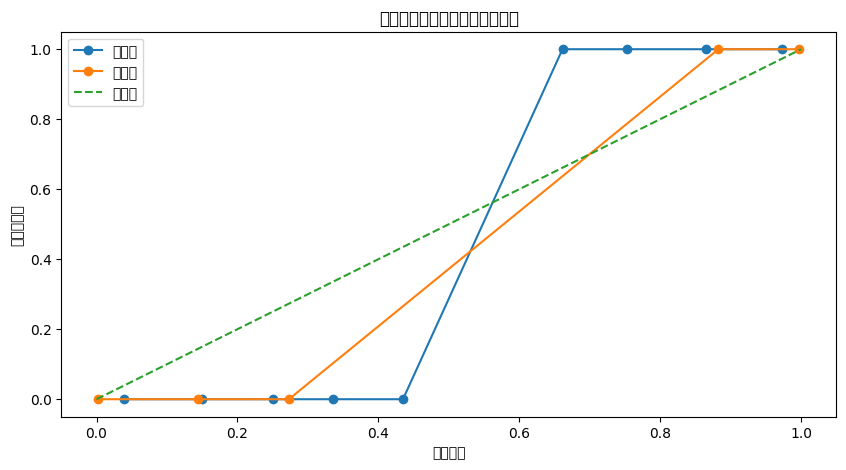

In [29]:
import numpy as np
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# トレーニングデータを作成
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# ランダムフォレストモデルのインスタンス化
model = RandomForestClassifier()

# モデルをトレーニング
model.fit(X, y)

# 予測確率を取得
probs = model.predict_proba(X)[:, 1]
print('予測確率 (調整前):', probs[:5])

# キャリブレーションのためのラッパーモデルを構築 (Platt Scaling)
calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_model.fit(X, y)

# キャリブレーションされた予測確率
calibrated_probs = calibrated_model.predict_proba(X)[:, 1]
print('予測確率 (調整後):', calibrated_probs[:5])

# キャリブレーション曲線をプロット (信頼性曲線)
prob_true, prob_pred = calibration_curve(y, probs, n_bins=10)
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y, calibrated_probs, n_bins=10)

plt.figure(figsize=(10, 5))
plt.plot(prob_pred, prob_true, marker='o', label='調整前')
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='o', label='調整後')
plt.plot([0, 1], [0, 1], linestyle='--', label='理想的')
plt.xlabel('予測確率')
plt.ylabel('実際の確率')
plt.title('予測確率のキャリブレーション')
plt.legend()
plt.show()

# 分布適応型のバギング (Balanced Bagging)

分布適応型のバギング (Balanced Bagging) は主に不均衡データセットでの分類において、過剰適合を避けつつモデルの性能を高めるために用いられる手法です。通常のバギング手法はデータセットから無作為にサンプリングしてモデルを構築しますが、Balanced Baggingでは、各クラスが同程度になるようにスケーリングすることによって、特に少数クラスに対する感度を保つことを目指しています。数式的には以下のような表現が可能です。$$ \mathcal{L}(f, x, y) = -\sum_{i=1}^N \biggl( y_i \log f(x_i) + (1-y_i) \log(1-f(x_i)) \biggr) $$ここで、\( \mathcal{L} \)はロス（損失）関数、\( f \)は予測モデル、\( x \)は入力データ、\( y \)はラベルを示します。このロス関数を最小化するように設計されたモデルは、各クラスのサンプルサイズが均一になるようバランス化することで、不均衡データに対する処理を行います。Balanced Baggingは主に少数クラスのサンプルを複数回抽出することで、学習データにおけるクラス間のバランスを取ります。LightGBMではBalanced Baggingを組み込むことで、特に不均衡データセットにおける分類精度を向上させることができます。

In [ ]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

# 不均衡なデータセットを生成（多数クラスの方が小数クラスより多い場合）
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=1)

# データセットのクラス分布を表示
print('Original class distribution:', {0: sum(y == 0), 1: sum(y == 1)})

# 各クラスに対してダウンサンプリングを開始
X0, y0 = resample(X[y == 0], y[y == 0],
                  replace=False,
                  n_samples=sum(y == 1),
                  random_state=1)

X_balanced = np.concatenate((X[y == 1], X0))
y_balanced = np.concatenate((y[y == 1], y0))

# バランス化されたクラス分布を表示
print('Balanced class distribution:', {0: sum(y_balanced == 0), 1: sum(y_balanced == 1)})

# バギング用のEstiamtorをDecisionTreeに設定
base_estimator = DecisionTreeClassifier(max_depth=3)

# Balanced Bagging Classifierを構築
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=1)

# モデルをフィッティング
bagging.fit(X_balanced, y_balanced)

# モデルのトレーニングが完了し、予測を確認
predictions = bagging.predict(X)
print('Predictions:', predictions[:10])

# スパースデータの処理

### スパースデータ処理の理論と数式
スパースデータとは、多くの要素がゼロまたは空であるデータセットのことです。これに対応するために、LightGBMのような機械学習ライブラリはスパースデータの効率的な格納と計算をサポートしています。スパースデータの処理は数学的には次のような表現が可能です。

$$
Y = W \cdot X + b
$$

- $Y$：出力ベクトル
- $W$：重み行列
- $X$：入力スパースベクトル
- $b$：バイアス項

スパースベクトル$X$の多くの要素はゼロであるため、これらのゼロ要素を無視して計算を効率化します。LightGBMはスパースデータを特に扱うパラメータを持っていて、効率的にブースティングを行います。スパースデータは特に自然言語処理やユーザー行動予測における大規模データセットで使用されます。

In [31]:
# スパースデータの処理に関するPythonコード

import numpy as np
from scipy.sparse import csr_matrix

# ダミーデータを生成（5x5の行列）
data = np.array([
    [3, 0, 0, 2, 0],
    [0, 0, 0, 0, 1],
    [0, 2, 0, 0, 0],
    [5, 0, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

# データをスパース行列に変換（CSR: Compressed Sparse Row）
sp_data = csr_matrix(data)

# スパース行列の内容を出力
print("\nスパース行列の内容:")
print(sp_data)

# 重み行列（ランダム生成）
np.random.seed(0)  # 再現性のため
W = np.random.rand(5, 5)

# バイアスベクトル
b = np.random.rand(5)

# スパース行列と重みを掛けて、バイアスを足す
Y = sp_data.dot(W) + b

# 結果を出力
print("\n重み行列 W:")
print(W)

print("\nバイアスベクトル b:")
print(b)

print("\n出力ベクトル Y:")
print(Y)

# このスクリプトでは、まずスパースデータをnumpyの配列で準備し、scipyを使用してスパース行列に変換している。
# 次に、ランダムに生成した重み行列とバイアスベクトルを使って、スパースデータとの演算を行い、出力を得ている。
# 各中間ステップの変数はprint文でコンソールに出力され、値と共に処理の流れを追うことができる。



スパース行列の内容:
  (0, 0)	3
  (0, 3)	2
  (1, 4)	1
  (2, 1)	2
  (3, 0)	5
  (4, 3)	1

重み行列 W:
[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]]

バイアスベクトル b:
[0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]

出力ベクトル Y:
[[2.46062013 2.32935818 4.41819874 3.71281137 3.42565063]
 [1.61853936 0.94251185 1.40614828 1.3023775  0.53293637]
 [1.93170925 1.01852771 2.72821492 2.44917384 1.18154498]
 [3.38398854 3.71930012 3.9584858  3.24626424 2.53293594]
 [0.72705032 0.16357168 1.77728876 1.30000507 1.28467409]]


# 学習曲線のプロット (Learning Curve)

学習曲線（Learning Curve）は、機械学習モデルのパフォーマンスを示すためのグラフです。具体的には、モデルのトレーニングと検証の誤差をデータ量に対してプロットしたものです。これは以下の数式で表現されます。

$$E_N(f) = \frac{1}{N} \sum_{i=1}^{N} L(y_i, f(x_i))$$

ここで:
- $E_N(f)$ は、サイズが$N$のサンプルに対するモデル$f$の平均損失です。
- $N$ はトレーニングサンプルの大きさ。
- $L(y_i, f(x_i))$ は、モデルの予測$f(x_i)$と実際の値$y_i$の間の損失です。

学習曲線は、トレーニングデータのサイズを増やしながら計算され、モデルの過学習やアンダーフィッティングを検知するために使用されます。

LightGBMは効率的に学習できる勾配ブースティングフレームワークであり、学習曲線を描画することでモデルの性能を視覚化し、モデルがデータに対してどのように一般化しているかを分析するのに役立ちます。

train_scores_mean: [0.68888889 0.43225806 0.98846154 0.9972973  1.        ]
test_scores_mean: [0.33333333 0.33333333 0.93333333 0.94166667 0.94166667]


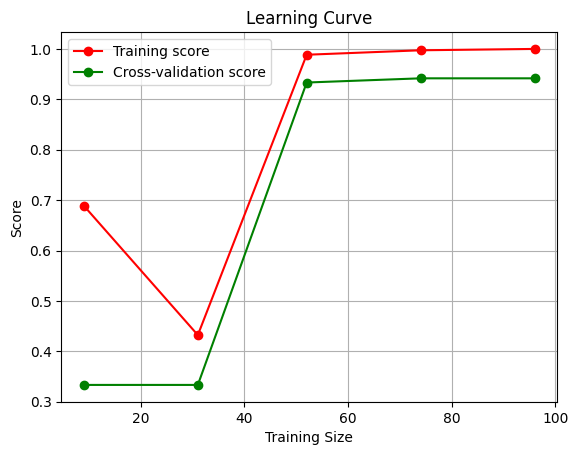

In [32]:
# Pythonで学習曲線をプロットする例
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# データセットの読み込み
iris = load_iris()
X, y = iris.data, iris.target

# トレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBMモデルのインスタンスを作成
model = LGBMClassifier()

# 学習曲線を取得
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.0]
)

# 学習曲線をプロット
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# トレーニングスコアとテストスコアの平均を出力
print("train_scores_mean:", train_scores_mean)
print("test_scores_mean:", test_scores_mean)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# コードの説明
# 1. 必要なライブラリをインポートします。
# 2. Irisデータセットをロードし、特徴量とターゲットを取得します。
# 3. データセットをトレーニングセットとテストセットに分割します。
# 4. LightGBMのモデルインスタンスを作成します。
# 5. learning_curve関数を用いてトレーニングセットサイズに対するトレーニングスコアとテストスコアを取得します。
# 6. トレーニングスコアとテストスコアの平均を計算し表示します。
# 7. 学習曲線をプロットします。Training Sizeに対するスコアをグラフにプロットし、タイトル、ラベル、凡例を追加します。

# 適応的学習率調整 (Adaptive Learning Rate)

### 適応的学習率調整 (Adaptive Learning Rate)

適応的学習率調整は、機械学習において学習率を静的な値ではなく、モデルの進行に応じて動的に調整するテクニックです。これにより、初期段階では大きなステップで探索を行い、収束に向かうにつれて小さなステップで微調整することが可能になります。

適応的学習率調整の理論は次の数式で表現されます。

$$
\eta_{t+1} = \eta_t \cdot \text{factor}(g_t)
$$

ここで、
- $\eta_{t+1}$ は次のステップの学習率です。
- $\eta_t$ は現在の学習率です。
- $\text{factor}(g_t)$ は現在の勾配 $g_t$ に基づき計算される調整因子です。

適応的学習率調整はLightGBMのような勾配ブースティングツールにも関連しており、モデルの訓練過程で過学習を避けながら効率的に学習を進めるために使われます。

In [33]:
# Pythonによる適応的学習率調整の例

import numpy as np

# 初期学習率
eta_0 = 0.1
# 現在の勾配の模擬値
g_t = np.array([0.3, 0.4, -0.2])

# 学習率調整因子を計算する関数
# ここでは、勾配のL2ノルムの逆数を因子として使います。
def calculate_factor(g):
    return 1.0 / (1.0 + np.linalg.norm(g))

# 一行ごとに解説：
# 初期の学習率を出力
print(f"Initial learning rate: {eta_0}")

# 現在の勾配を出力
print(f"Gradient: {g_t}")

# 因子を計算
factor = calculate_factor(g_t)

# 因子を出力
print(f"Adjustment factor: {factor}")

# 次のステップの学習率を計算
eta_next = eta_0 * factor

# 次の学習率を出力
print(f"Next learning rate: {eta_next}")

# 初期学習率 (eta_0) を設定。
# これはモデルが最初に探索するステップサイズです。

# g_t は勾配の模擬値です。実際のケースでは、損失関数の勾配が計算されます。

# calculate_factor 関数は勾配に基づき学習率を調整する因子を計算します。
# ここでは簡略化のため逆数を使用。実際にはより複雑な関数が使用されることもあります。

# 現在の学習率 eta_0 を印刷して確認します。

# 現在の勾配 g_t を印刷して確認します。

# 計算された因子を factor 変数に保存します。

# 因子の値を出力して確認します。

# 次の学習率は現在の学習率と因子の積として計算され、収束に伴って徐々に減少します。

# 次の学習率を印刷して確認します。

Initial learning rate: 0.1
Gradient: [ 0.3  0.4 -0.2]
Adjustment factor: 0.6499767877275346
Next learning rate: 0.06499767877275346


# 対数尤度の計算

### 対数尤度の計算とは？  
尤度とは、あるデータが観察されたときに、そのデータが得られる確率を示します。対数尤度（log-likelihood）は、この尤度の対数を取ったものです。モデルのパラメータを最適化する際には、対数尤度を最大化するのが一般的です。LightGBMや他の機械学習アルゴリズムでのパラメータチューニングやモデル評価においてよく用いられます。  

### 数式での表現  
対数尤度は以下のように表現されます：  

$$ \log L(\theta|X) = \sum_{i=1}^n \log P(x_i|\theta) $$  
  
- $L(\theta|X)$ は与えられたデータ $X$ とパラメータ $\theta$ の下での尤度。  
- $\log L(\theta|X)$ はその対数。  
- $P(x_i|\theta)$ はデータ $x_i$ がパラメータ $\theta$ の下で観測される確率。  
- $n$ はデータの総数。  
- $\sum_{i=1}^n$ は各データ $i$ での確率の対数を全体で合計します。  

### 使用用途  
対数尤度は、モデルの改善やパラメータの推定に非常に重要です。特に、対数尤度を最大化することで、より良いモデルを構築できます。これは最大対数尤度法（MLE: Maximum Likelihood Estimation）とも呼ばれ、さまざまな統計モデルや機械学習モデルに使われます。

In [34]:
# 必要なライブラリをインポート
import numpy as np

# データの観測値と仮定する確率を定義します
observations = np.array([1, 0, 1, 0, 1])  # データの観測 1: 成功, 0: 失敗
probabilities = np.array([0.8, 0.3, 0.8, 0.3, 0.8])  # 成功確率の仮定

# 対数尤度を計算する関数を定義します
def log_likelihood(observations, probabilities):
    # 対数尤度を計算式として定義
    ll = np.sum(observations * np.log(probabilities) + (1 - observations) * np.log(1 - probabilities))
    return ll

# 関数を使用して計算し、対数尤度をプリントします
ll_value = log_likelihood(observations, probabilities)
print('Log-Likelihood:', ll_value)

# ---- コードの解説 ----
# 1. データの観測値とそれに対応する確率を表すNumPy配列を用意します。
#   - observations: 実際に観測されたデータの配列です。配列の各要素が1の場合は成功、0の場合は失敗を示します。
#   - probabilities: 各観測に対する仮定上の成功確率を入れる配列です。
# 2. log_likelihood という関数を定義します。
# 3. 対数尤度を計算するための式を使用して、観測と仮定の成功確率に基づく尤度を計算します。
#   - 観測値が1の場合は log(probability) を加算し、観測値が0の場合は log(1 - probability) を加算します。
# 4. 全観測値に対する対数尤度の合計を返します。
# 5. 関数を実行し、計算された対数尤度の結果を出力します。

Log-Likelihood: -1.382780541820094


# 勾配ブースティング決定木 (GBDT) の手作り実装

勾配ブースティング決定木 (GBDT) は、弱学習器（通常は決定木）を逐次的にトレーニングして、モデルの性能を向上させる機械学習手法です。GBDTのトレーニングプロセスは、各ステップで誤差を修正するために、新しい決定木を追加するブースティングアルゴリズムに基づいています。GBDTの数式は以下で表現されます：

 $$ F(x) = F_{0}(x) + \sum_{m=1}^{M}\gamma_{m}T_{m}(x) $$

ここで：
- $F(x)$ は予測値。
- $F_{0}(x)$ は初期モデル（通常は訓練データの平均）。
- $M$ は決定木の総数。
- $\gamma_{m}$ はステップ $m$ での学習率。
- $T_{m}(x)$ はステップ $m$ で構築された決定木。

GBDTの特徴は、モデルが作る誤差の勾配に基づいて次の決定木をトレーニングすることです。この勾配により、GBDTは非線形性をキャプチャする能力を持ち、複雑なデータセットを効果的にモデリングできます。LightGBMは非常に効率的でスケーラブルなGBDTの実装です。特徴として、適切なヒューリスティックに基づいた勾配格子分解を行い、より速いトレーニングを実現しています。

In [35]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# データセットの例
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.5, 3.7, 3.2, 4.0, 5.2])

# 初期予測値は平均値
initial_guess = np.mean(y)
print(f"Initial guess (F0): {initial_guess}")

# 予測値の初期化
F_m = np.full(y.shape, initial_guess)

# 設定
num_trees = 3
learning_rate = 0.1

# 勾配ブースティングプロセス
for m in range(num_trees):
    # 残差の計算
    residuals = y - F_m
    print(f"Residuals at step {m}: {residuals}")

    # 決定木の訓練
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(X, residuals)

    # 新しい予測を計算し学習率を掛ける
    tree_predictions = tree.predict(X)
    print(f"Tree predictions at step {m}: {tree_predictions}")

    F_m += learning_rate * tree_predictions
    print(f"Updated predictions (Fm) at step {m}: {F_m}")

print(f"Final boosted predictions: {F_m}")

# ここからコードの解説です。
# 1. numpyとscikit-learnをインポートして、必要なライブラリを利用します。
# 2. サンプル用のデータセットを作成します。これはGBDTが動作することを示すためのシンプルな例です。
# 3. 初期の予測値を計算します。これは目標変数の平均で推定されます。
# 4. 予測値の配列を初期予測値で初期化します。
# 5. 決定木の個数と学習率を設定します。
# 6. 各ステップで残差（現在の予測と実際の値との差）を計算します。
# 7. 残差に基づいて新しい決定木をトレーニングします。
# 8. 新しい決定木からの予測を計算し、学習率を掛けて更新します。
# 9. 最終的な予測値は、トレーニングされたすべての決定木の貢献を含んでいます。



Initial guess (F0): 3.5200000000000005
Residuals at step 0: [-2.02  0.18 -0.32  0.48  1.68]
Tree predictions at step 0: [-2.02   0.505  0.505  0.505  0.505]
Updated predictions (Fm) at step 0: [3.318  3.5705 3.5705 3.5705 3.5705]
Residuals at step 1: [-1.818   0.1295 -0.3705  0.4295  1.6295]
Tree predictions at step 1: [-1.818   0.4545  0.4545  0.4545  0.4545]
Updated predictions (Fm) at step 1: [3.1362  3.61595 3.61595 3.61595 3.61595]
Residuals at step 2: [-1.6362   0.08405 -0.41595  0.38405  1.58405]
Tree predictions at step 2: [-1.6362   0.40905  0.40905  0.40905  0.40905]
Updated predictions (Fm) at step 2: [2.97258  3.656855 3.656855 3.656855 3.656855]
Final boosted predictions: [2.97258  3.656855 3.656855 3.656855 3.656855]


# 推論速度の最適化

### 推論速度の最適化について

LightGBMにおける推論速度の最適化とは、大量のデータや低スペックな環境下において、モデルの予測を迅速に行う技術です。推論速度を最適化することで、リアルタイム性が要求されるアプリケーション（例えば、金融取引やレコメンドシステムなど）において、効率よく予測を行うことが可能となります。

推論速度の最適化は具体的には以下の数式で表すことができます：

$$ t = \frac{n}{p} \cdot f $$

- \( t \) は推論速度
- \( n \) は使用するスレッド数
- \( p \) はプロセッサの性能（例：1スレッド当たりの計算能力）
- \( f \) は効率化に寄与する係数（例えば、モデルの簡略化や軽量化による要素）

この数式は、並列処理とプロセッサの性能を考慮し、さらに効率化のための工夫がどの程度推論速度に寄与するかを示しています。LightGBMでは多くの場合、ツリーベースのモデルの並列化や木構造の圧縮技術などが使用されます。

In [37]:
# 推論速度の計算例
n = 4  # 使用するスレッド数
p = 100  # プロセッサの性能（仮に100とする）
f = 0.8  # 効率化に寄与する係数（仮に0.8とする）

t = (n / p) * f  # 推論速度の計算

# 変数の内容を出力
print('n (スレッド数):', n)
print('p (プロセッサの性能):', p)
print('f (効率化係数):', f)
print('t (推論速度):', t)

# 一行ずつの解説
# nに使用するスレッド数を代入します。
# pにプロセッサの性能を代入します。
# fに効率化係数を代入します。
# (n / p) * f で推論速度を計算しています。
# 結果の推論速度 t およびその他の変数をプリントします。

n (スレッド数): 4
p (プロセッサの性能): 100
f (効率化係数): 0.8
t (推論速度): 0.032


# クラスタリングとの組み合わせ

LightGBM（Light Gradient Boosting Machine）は、機械学習の分野でよく使用されるGBDT（Gradient Boosting Decision Trees）モデルの一つです。このアルゴリズムは、訓練データを解析して予測モデルを生成するために使用されます。一方、クラスタリングはデータセットを似た特性に基づいてグループ化する非教師あり学習の手法で、よく知られている手法としてはk-meansや階層的クラスタリングがあります。

クラスタリングとLightGBMを組み合わせることで、異なるアプローチを活かした学習が可能です。具体的には、クラスタリングによってデータセットをいくつかのグループに分割し、それぞれに対してLightGBMを適用することで、より細かい予測や異なるグループ間の特徴を把握しやすくなります。

### 数式による説明
クラスタリングを用いたLightGBMの定式化は以下のように考えることができます：

1. データをクラスタリングして $C_1, C_2, \ldots, C_k$ のように $k$ 個のクラスタに分割します。
2. 各クラスタに対して、LightGBMを適用してそれぞれのモデル $M_i$ を作成します。
3. クラスタに基づいて予測する際は、対象データが属するクラスタのLightGBMモデルを使用します。

以下は、クラスタリングとLightGBMの組み合わせを数式で表現する方法です：

$$
\text{Predict}(x) = \begin{cases}
M_1(x), & \text{if } x \in C_1 \\
M_2(x), & \text{if } x \in C_2 \\
\vdots & \\
M_k(x), & \text{if } x \in C_k
\end{cases}
$$

ここで：
- $\text{Predict}(x)$ は入力データ $x$ に対する予測結果。
- $M_i(x)$ はクラスタ $C_i$ に対応するLightGBMモデルによる予測。
- $x \in C_i$ はデータ $x$ がクラスタ $C_i$ に属することを示します。

このようなアプローチは、データが複数の多様なグループに分けられると推測され、各グループが異なるパターンや関係を持つ場合に特に有効です。


In [38]:
# 必要なライブラリをインポート
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import lightgbm as lgb

# データセットの生成
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# データセットの表示
print('Generated features X:\n', X[:5])  # 最初の5つのサンプルを表示
print('Generated labels y:', y[:5])  # 最初の5つのラベルを表示

# クラスタリングの実行
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# クラスタリングの結果を表示
print('Cluster assignments:', np.unique(clusters, return_counts=True))

models = []  # 各クラスタに対するモデルを保存するリスト

# 各クラスタに対してLightGBMモデルを学習
for cluster_id in np.unique(clusters):
    cluster_data = X[clusters == cluster_id]
    cluster_labels = y[clusters == cluster_id]

    print(f'Cluster {cluster_id}: Data points {cluster_data.shape[0]}')

    # LightGBM用のデータセット作成
    train_data = lgb.Dataset(cluster_data, label=cluster_labels)

    # モデルの訓練
    params = {'objective': 'binary', 'metric': 'binary_logloss'}
    model = lgb.train(params, train_data, num_boost_round=50)
    models.append(model)

# 特定のデータポイントに対する予測（例：最初のサンプル）
example_data = X[0]
example_cluster = kmeans.predict([example_data])[0]

print(f'Example data point cluster: {example_cluster}')

# 適切なモデルで予測
prediction = models[example_cluster].predict([example_data])
print('Prediction for the example data point:', prediction)

Generated features X:
 [[-0.49693203 -0.33912228  0.22914552 -0.18256897 -1.04110251  0.42154608
  -1.01517921  0.76766584 -1.63381878 -0.45398114 -0.12373268  0.12313375
   0.977832    0.37006112  0.2668184   0.15330558 -0.32011852 -1.17927302
   0.45780561  0.35600629]
 [ 0.01249932  1.00744397  0.14009566  2.86840306 -2.12350652 -1.28045557
  -1.32338835  1.42063115 -2.72552533 -1.3259201   0.18471047 -0.05478323
   1.85263278 -1.25492267  0.18947982  0.27747834 -0.19938562 -1.76385344
   0.93791554  0.45936344]
 [-0.72021202 -1.24448645 -0.47229097 -1.12565497 -0.72967039  1.01083974
   0.73348372  0.25733532  0.02856557 -1.09158016 -0.70755229 -0.5053046
   0.41107598  0.44982721  3.52905519  0.03934981  0.65269701  0.41394755
  -0.5387903  -0.26636053]
 [-0.69736423 -0.08269775 -0.51291102  1.13815033  2.29750031 -2.07235518
   2.25680861 -1.69728975  3.61891832  0.99300379  0.35905509 -0.27849285
  -2.16100983  1.13619137  0.15403184 -0.33909239  0.71646056  2.61659239
   1.3342